In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/impact.csv')
print(df.head())

      Names    Age Gender  Mobile Phone  Mobile Operating System   \
0       Ali  21-25    Male           Yes                  Android   
1     Bilal  21-25    Male           Yes                  Android   
2    Hammad  21-25    Male           Yes                      IOS   
3  Abdullah  21-25    Male           Yes                  Android   
4     Waqar  21-25    Male           Yes                      IOS   

  Mobile phone use for education Mobile phone activities Helpful for studying  \
0                      Sometimes            Social Media                  Yes   
1                      Sometimes            Social Media                  Yes   
2                      Sometimes            All of these                  Yes   
3                     Frequently            All of these                  Yes   
4                     Frequently            All of these                  Yes   

     Educational Apps Daily usages Performance impact      Usage distraction  \
0  Educational Vid

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Display the first few rows of the dataset
print(df.head())



# Handle Missing Data
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Removing Duplicates
df_imputed.drop_duplicates(inplace=True)

# Encoding Categorical Variables and Scaling Numeric Data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the target variable (replace 'Health rating' with your actual target column)
X = df_imputed.drop('Health rating', axis=1)
y = df_imputed['Health rating']

# # Preprocess the data
# X_preprocessed = preprocessor.fit_transform(X)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

      Names    Age Gender  Mobile Phone  Mobile Operating System   \
0       Ali  21-25    Male           Yes                  Android   
1     Bilal  21-25    Male           Yes                  Android   
2    Hammad  21-25    Male           Yes                      IOS   
3  Abdullah  21-25    Male           Yes                  Android   
4     Waqar  21-25    Male           Yes                      IOS   

  Mobile phone use for education Mobile phone activities Helpful for studying  \
0                      Sometimes            Social Media                  Yes   
1                      Sometimes            Social Media                  Yes   
2                      Sometimes            All of these                  Yes   
3                     Frequently            All of these                  Yes   
4                     Frequently            All of these                  Yes   

     Educational Apps Daily usages Performance impact      Usage distraction  \
0  Educational Vid

NameError: name 'numeric_features' is not defined

      Names    Age Gender  Mobile Phone  Mobile Operating System   \
0       Ali  21-25    Male           Yes                  Android   
1     Bilal  21-25    Male           Yes                  Android   
2    Hammad  21-25    Male           Yes                      IOS   
3  Abdullah  21-25    Male           Yes                  Android   
4     Waqar  21-25    Male           Yes                      IOS   

  Mobile phone use for education Mobile phone activities Helpful for studying  \
0                      Sometimes            Social Media                  Yes   
1                      Sometimes            Social Media                  Yes   
2                      Sometimes            All of these                  Yes   
3                     Frequently            All of these                  Yes   
4                     Frequently            All of these                  Yes   

     Educational Apps Daily usages Performance impact      Usage distraction  \
0  Educational Vid

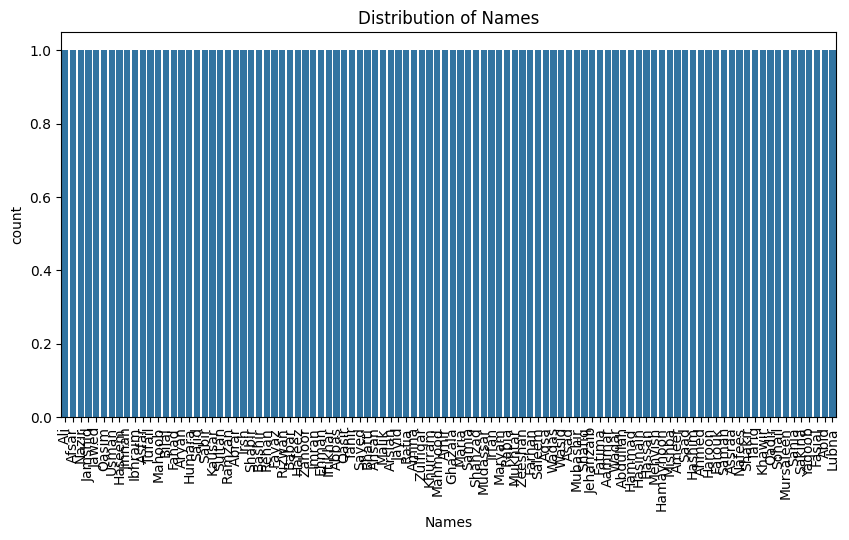

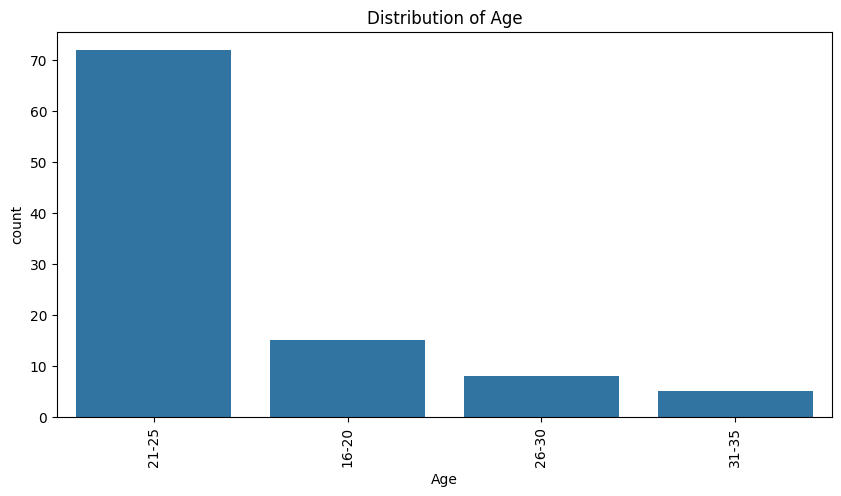

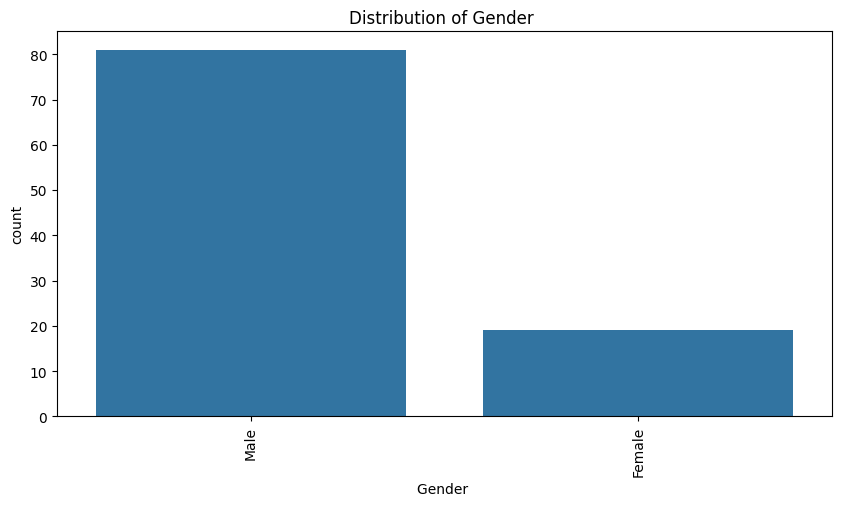

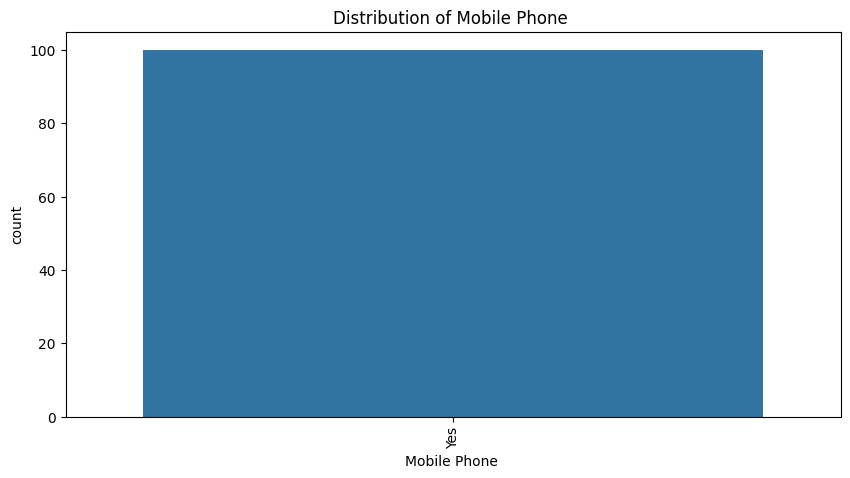

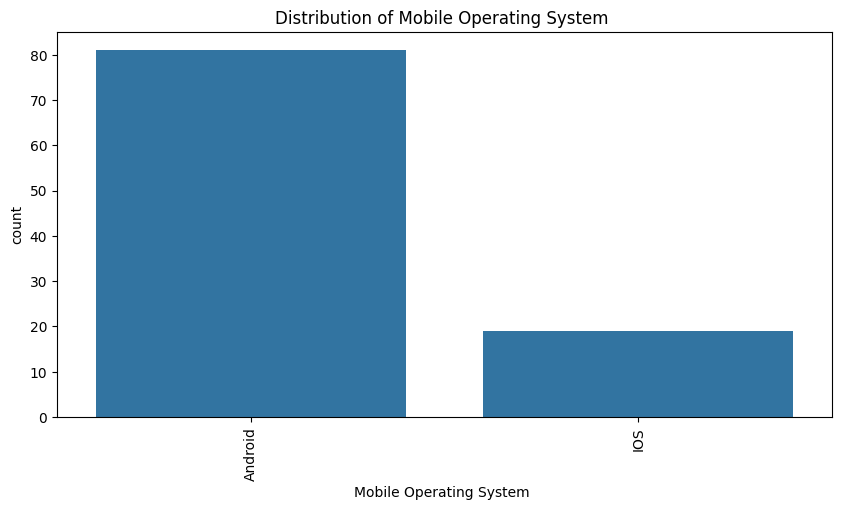

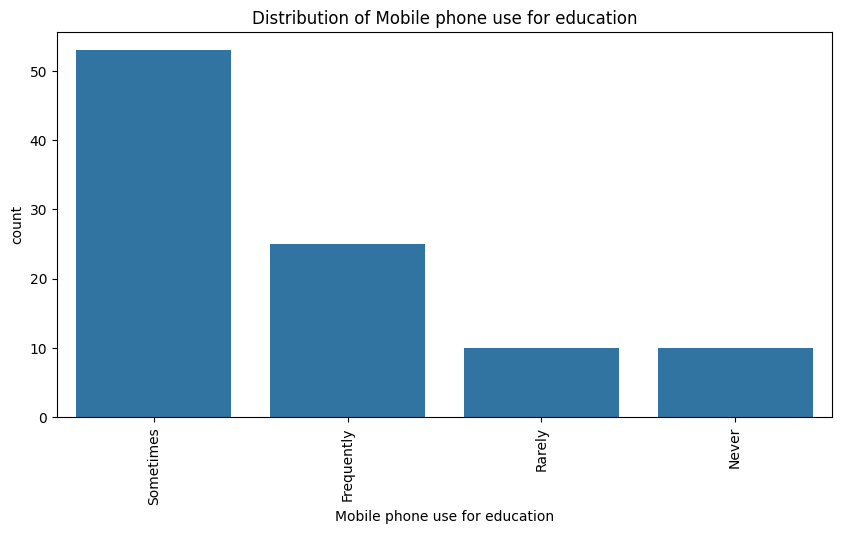

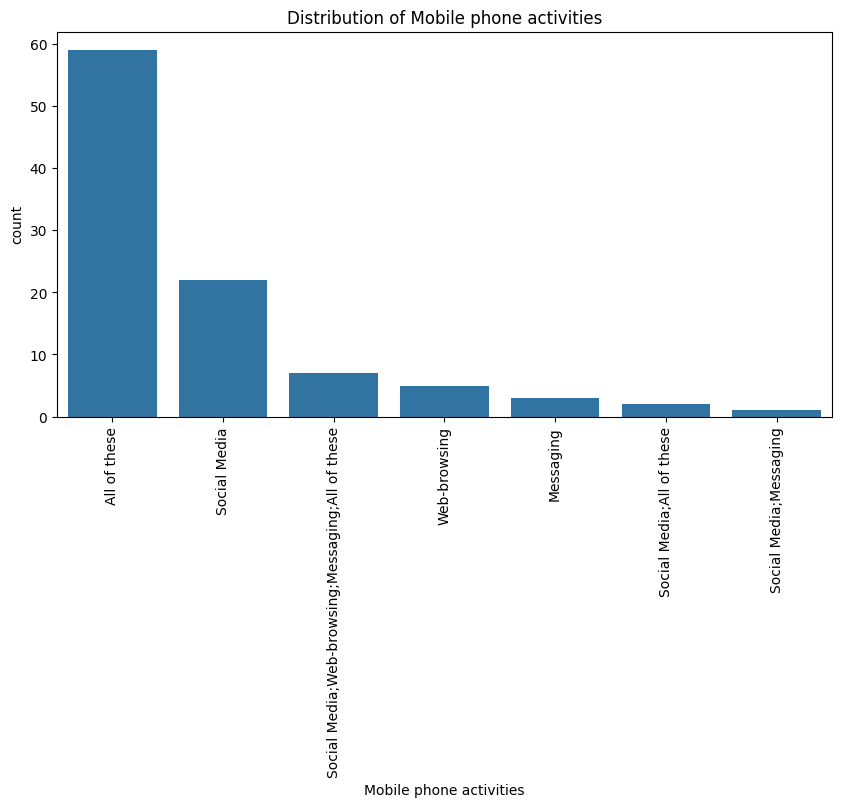

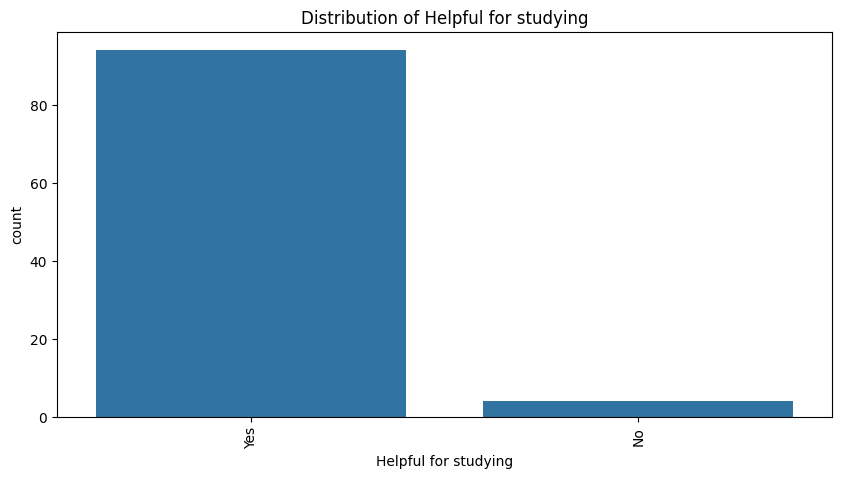

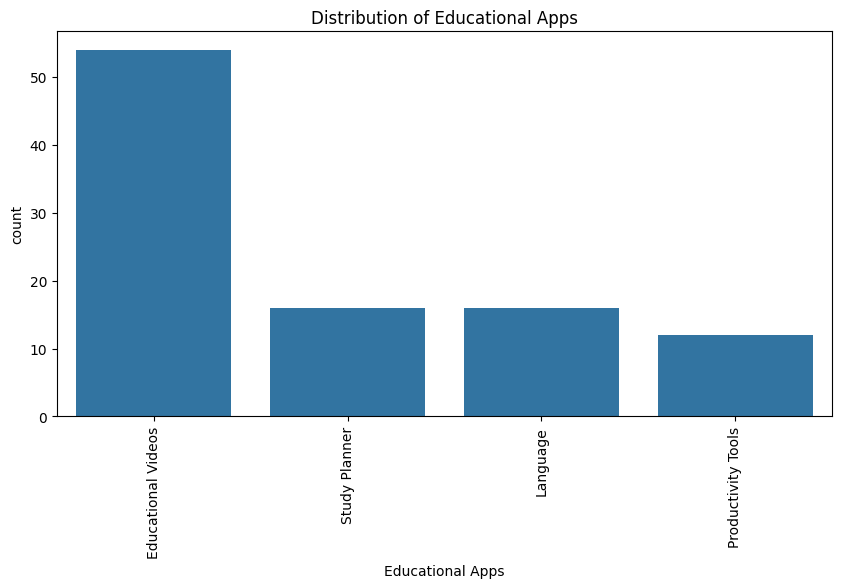

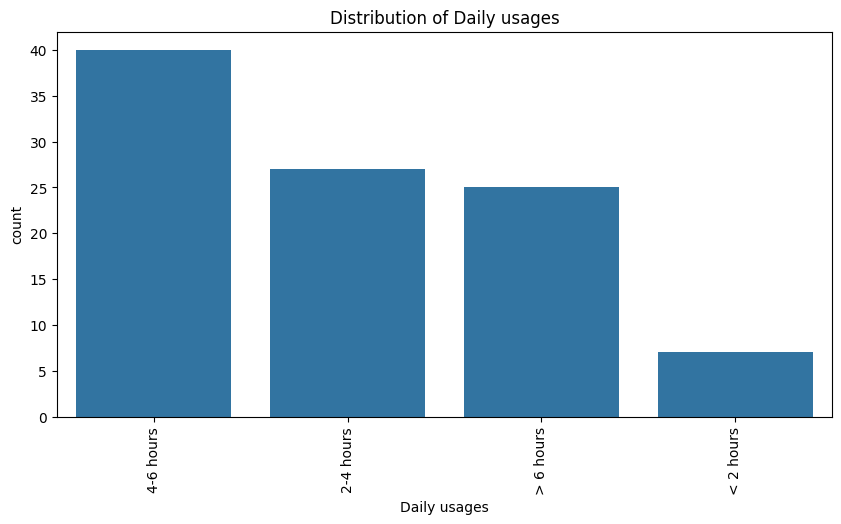

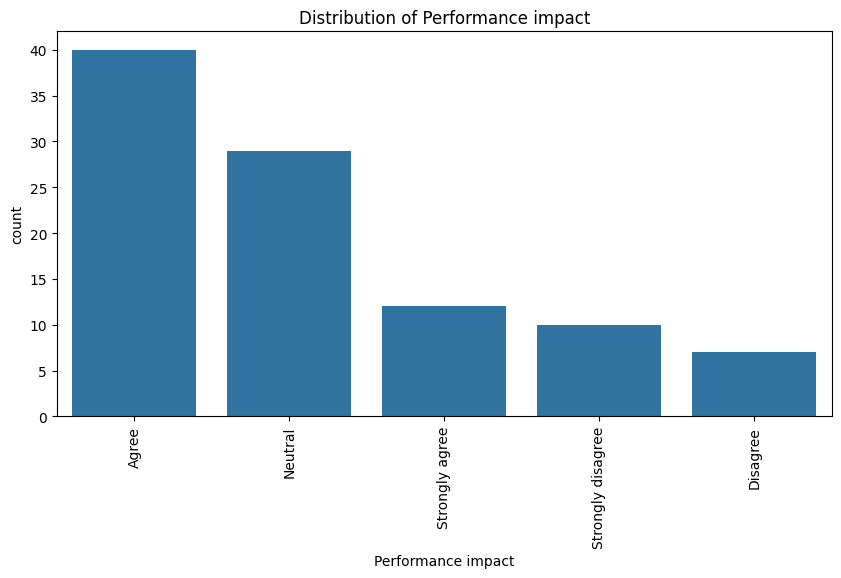

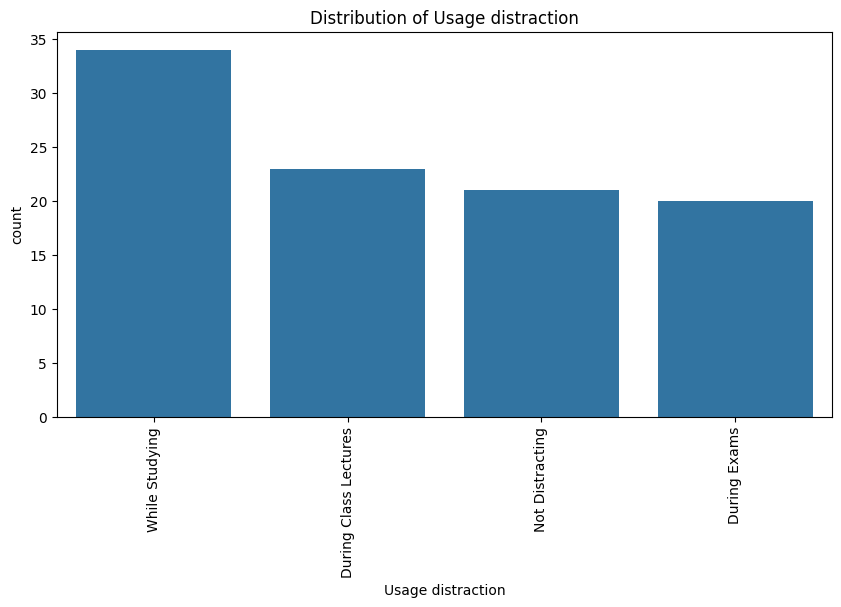

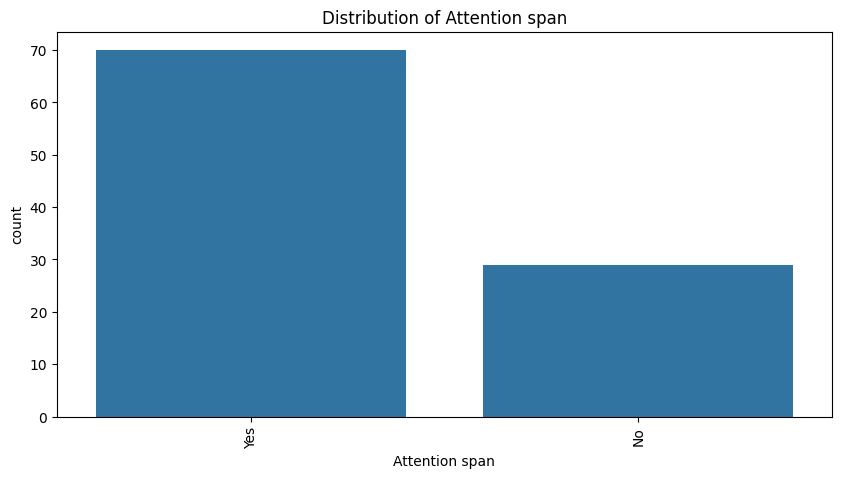

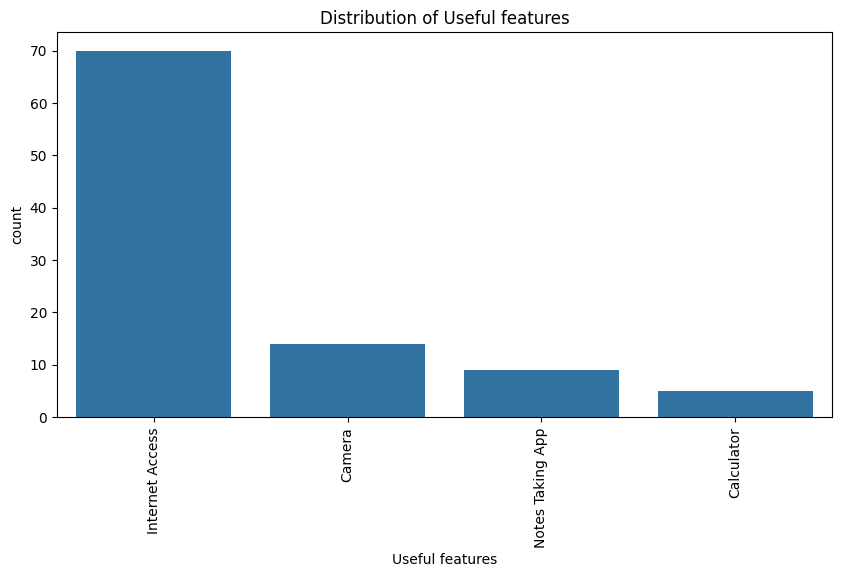

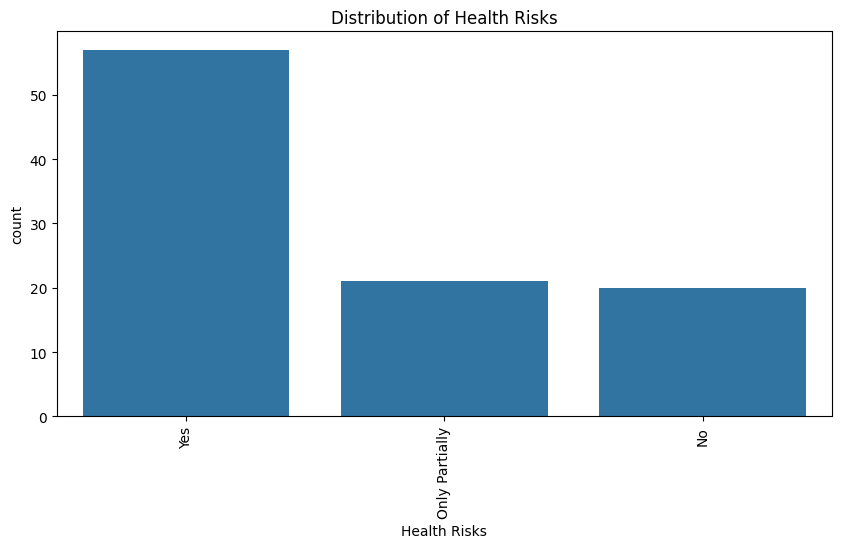

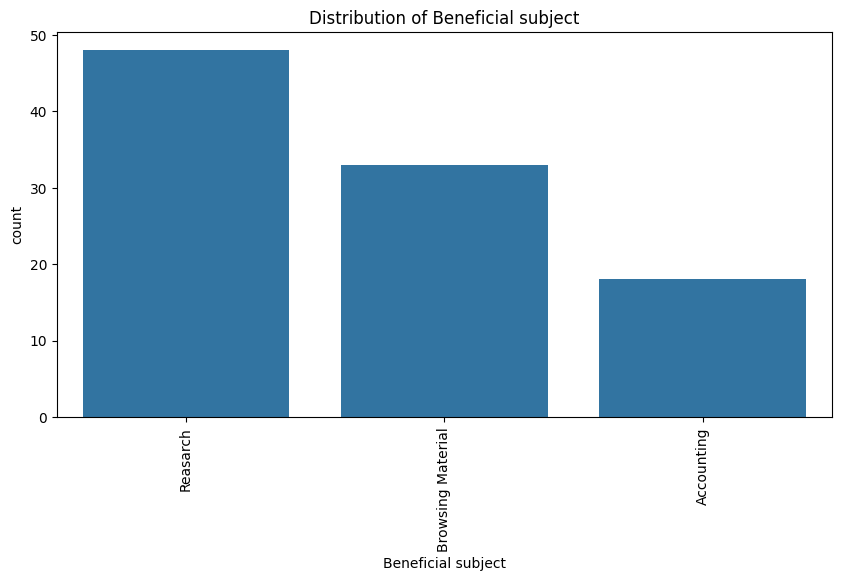

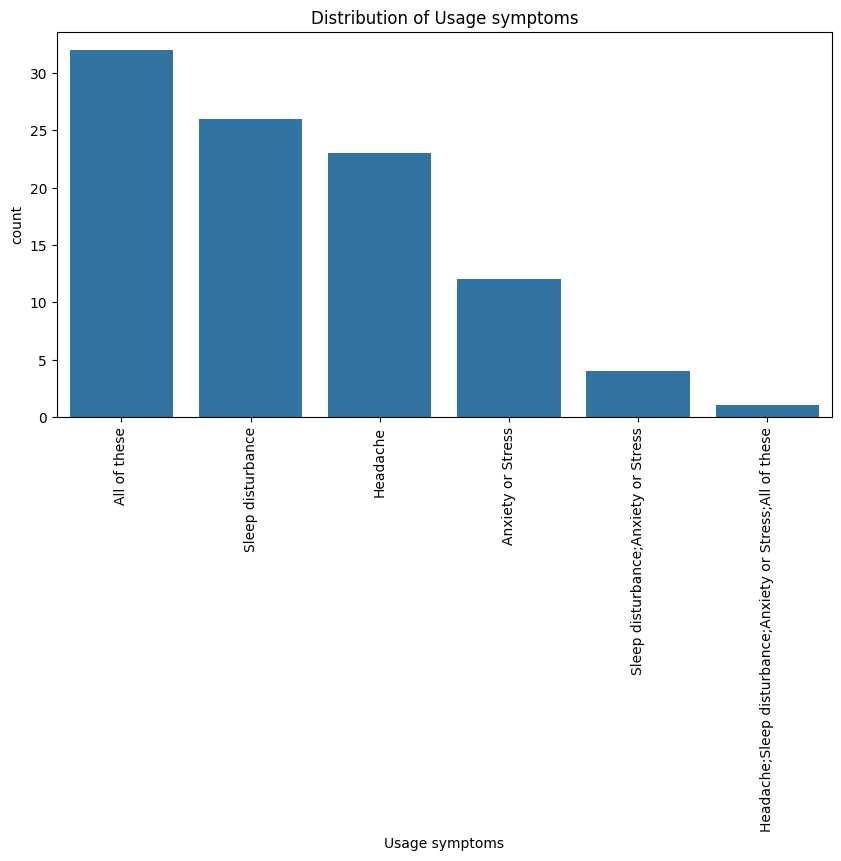

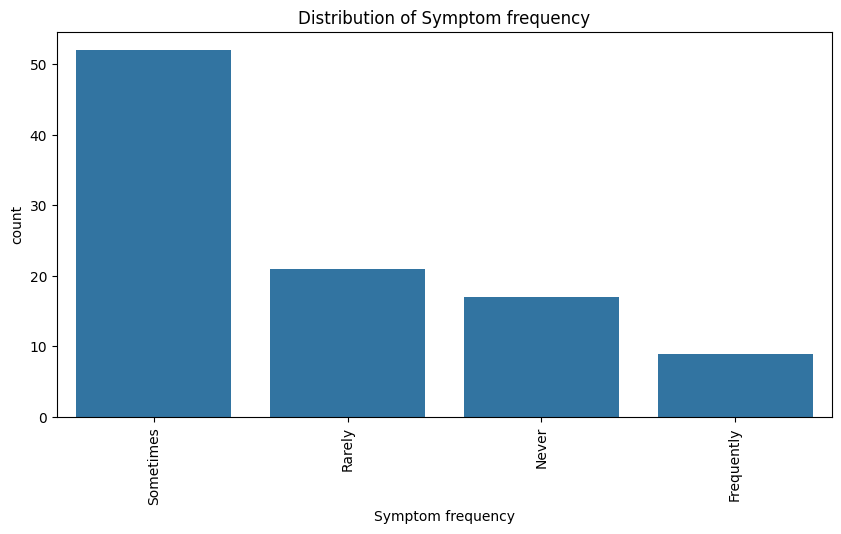

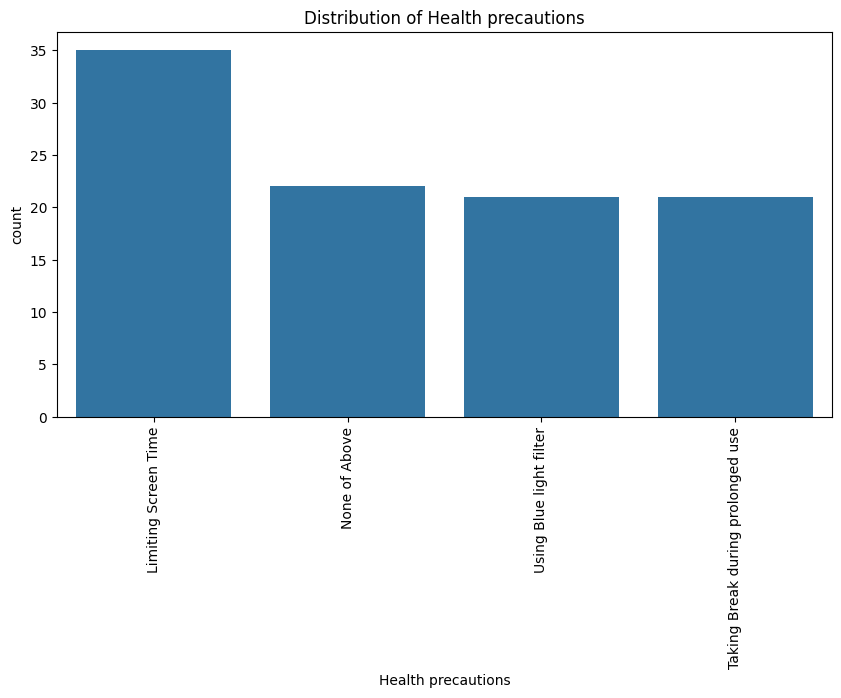

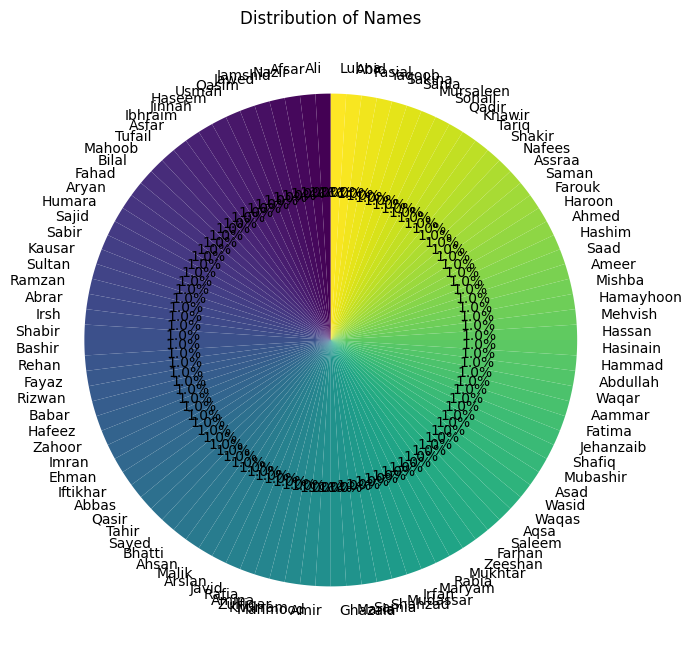

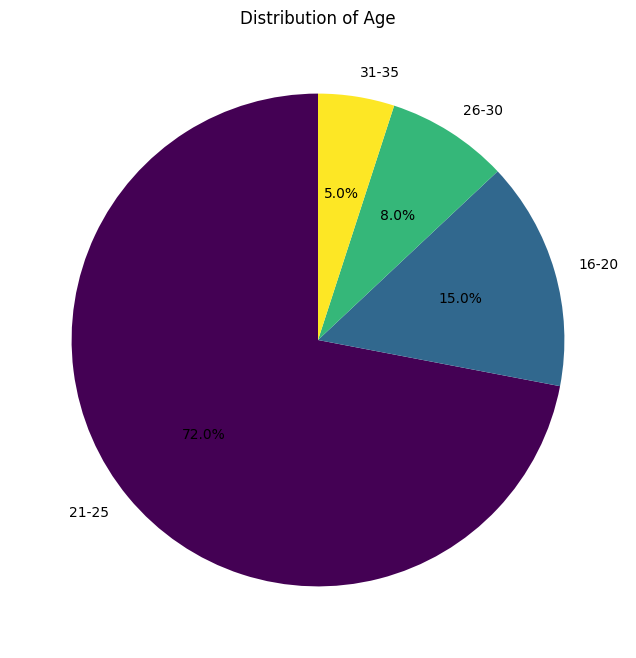

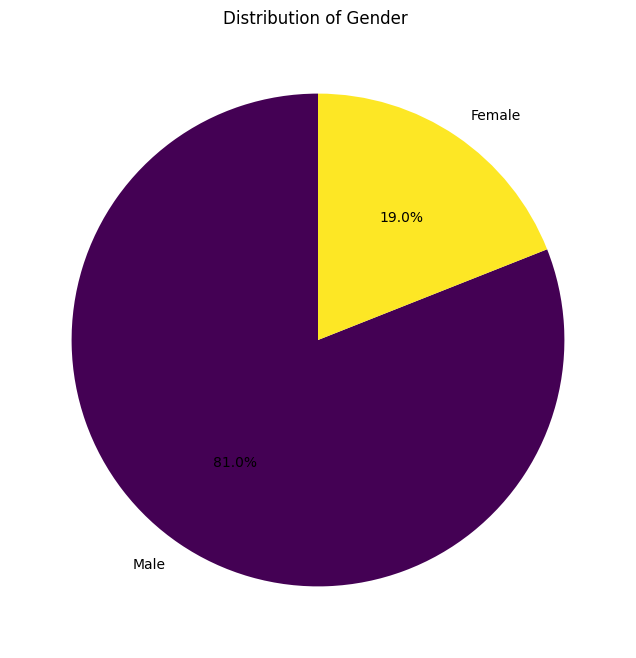

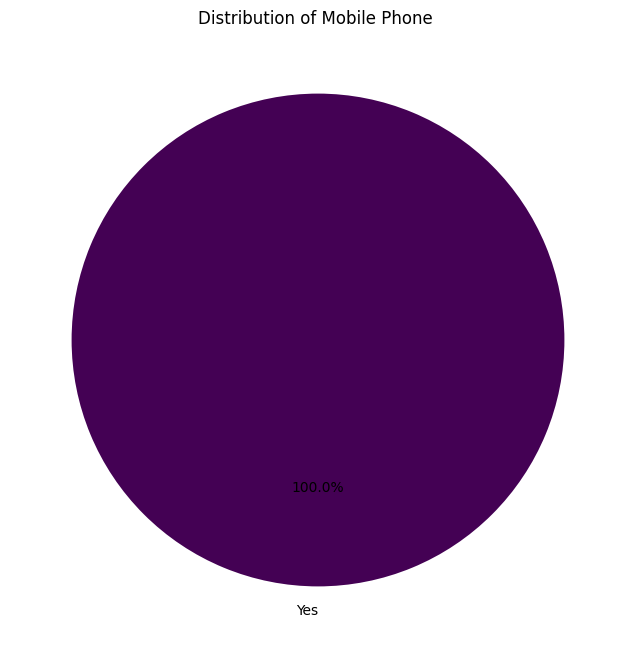

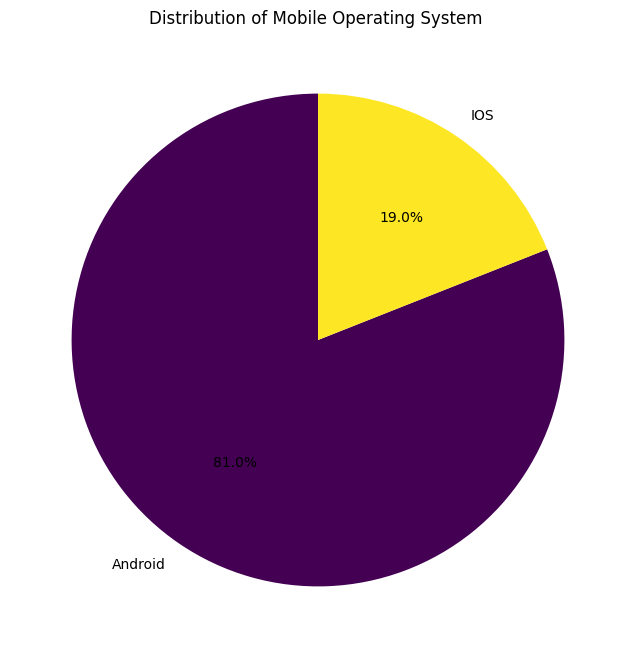

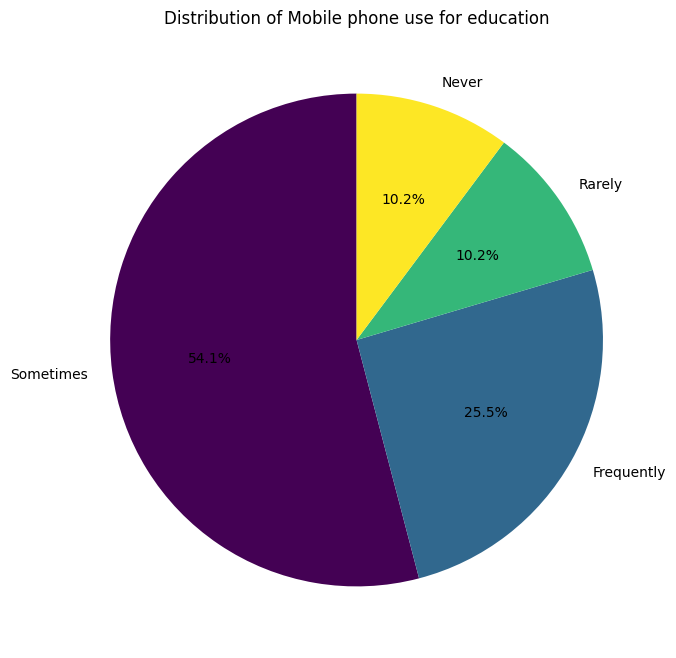

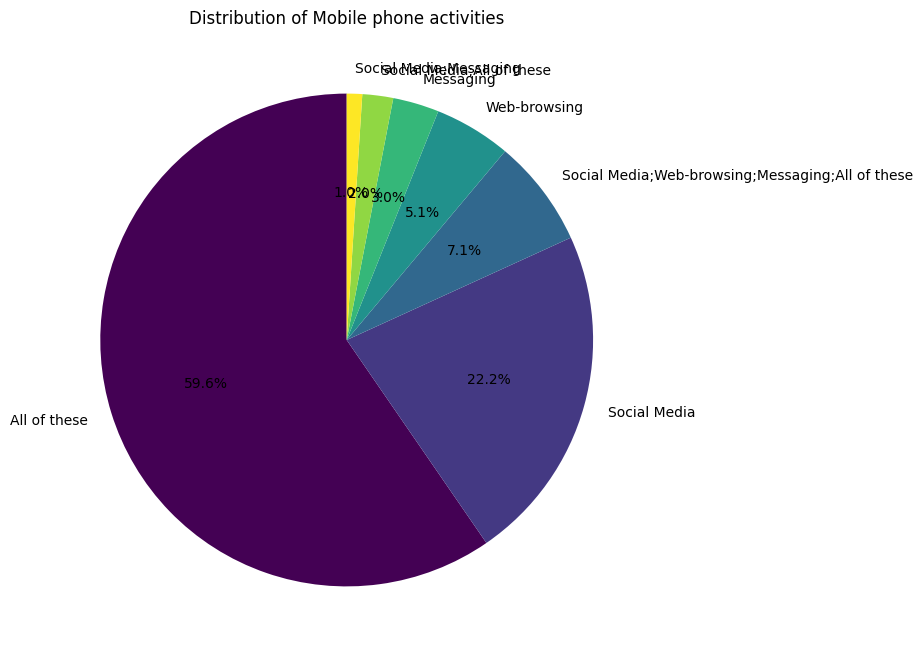

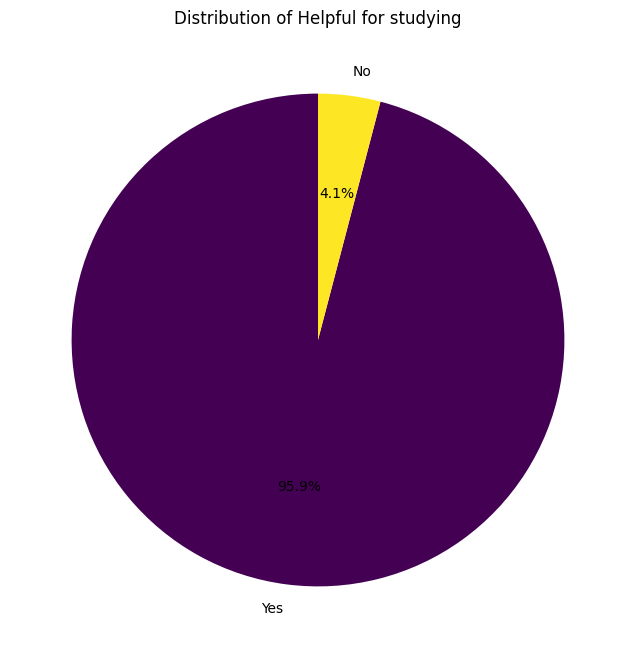

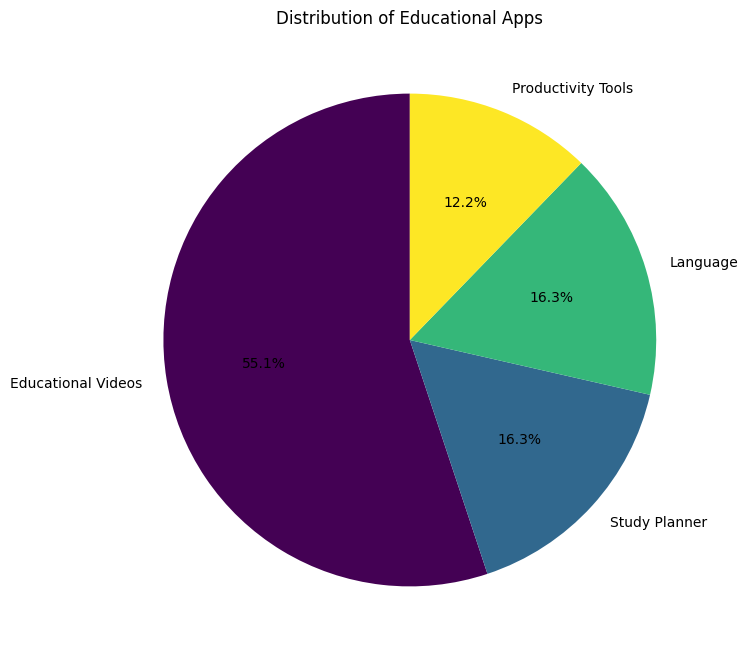

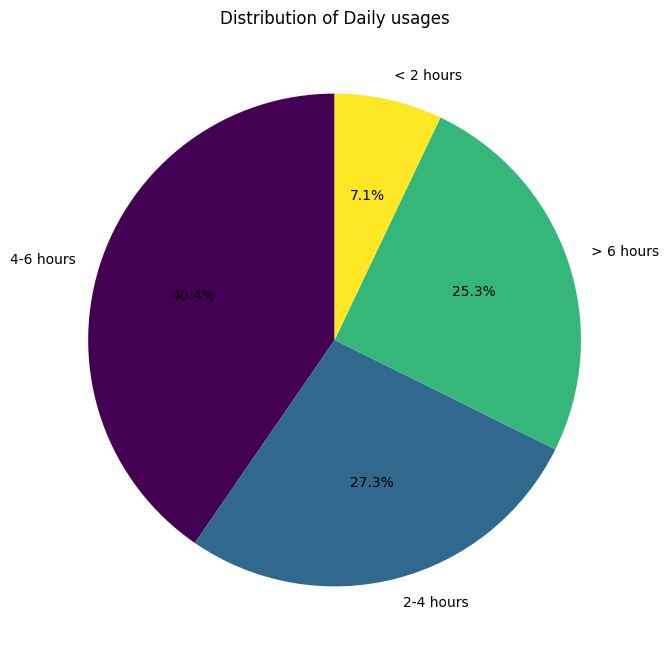

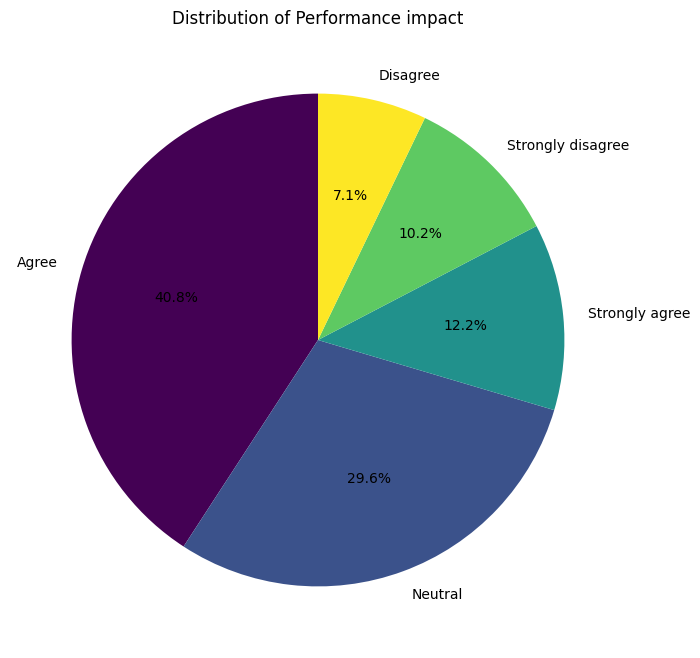

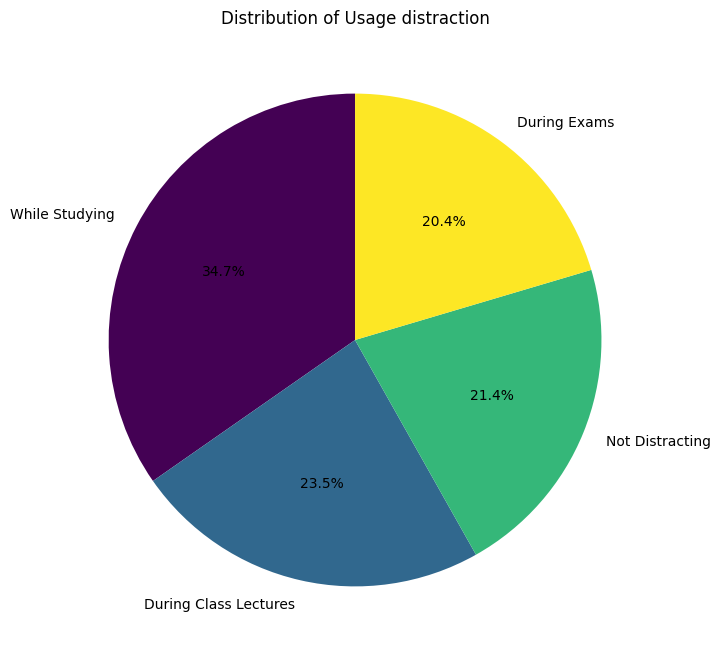

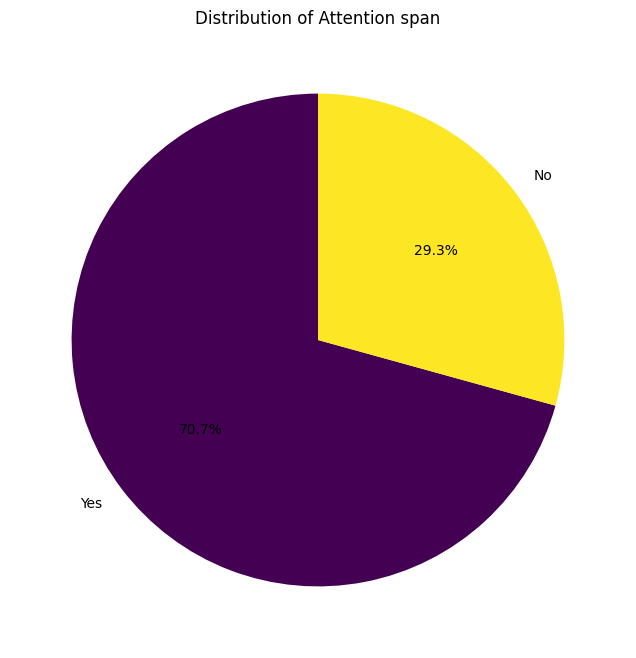

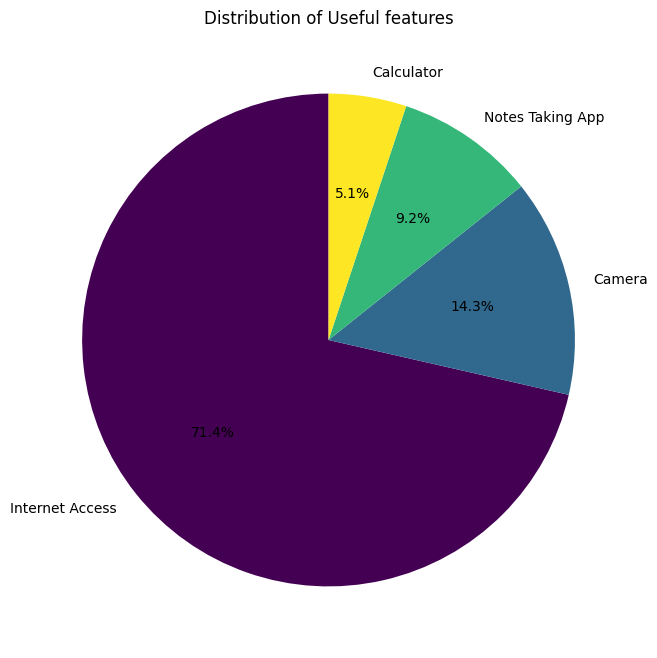

KeyboardInterrupt: 

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Print the first few rows to verify
print(df.head())

# Print the column names to verify
print(df.columns)

# Assuming 'Health rating' is the target variable
target_column = 'Health rating'

# Handle Missing Data
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Removing Duplicates
df_imputed.drop_duplicates(inplace=True)

# Treat all columns as categorical, except the target
categorical_features = [col for col in df.columns if col != target_column]

# Encoding Categorical Variables
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the target variable
X = df_imputed.drop(target_column, axis=1)
y = df_imputed[target_column]

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Exploratory Data Analysis (EDA)

# Bar plots for categorical variables
for column in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {column}')
    plt.show()

# Encoding categorical variables for pair plot
df_encoded = df.apply(lambda x: pd.factorize(x)[0])


# # Box plots for comparing distributions across categories
# plt.figure(figsize=(10, 5))
# sns.boxplot(x=df['Gender'], y=df_encoded['Age'])
# plt.title('Box Plot of Age by Gender')
# plt.show()

# Pie charts for categorical data distribution
for column in categorical_features:
    plt.figure(figsize=(8, 8))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()

# Modeling using Traditional Machine Learning Methods

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))



      Names    Age Gender  Mobile Phone  Mobile Operating System   \
0       Ali  21-25    Male           Yes                  Android   
1     Bilal  21-25    Male           Yes                  Android   
2    Hammad  21-25    Male           Yes                      IOS   
3  Abdullah  21-25    Male           Yes                  Android   
4     Waqar  21-25    Male           Yes                      IOS   

  Mobile phone use for education Mobile phone activities Helpful for studying  \
0                      Sometimes            Social Media                  Yes   
1                      Sometimes            Social Media                  Yes   
2                      Sometimes            All of these                  Yes   
3                     Frequently            All of these                  Yes   
4                     Frequently            All of these                  Yes   

     Educational Apps Daily usages Performance impact      Usage distraction  \
0  Educational Vid

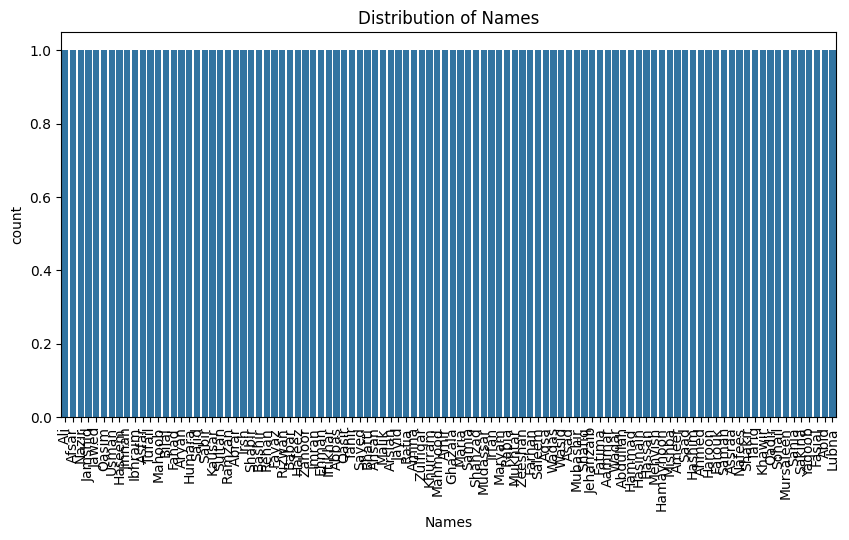

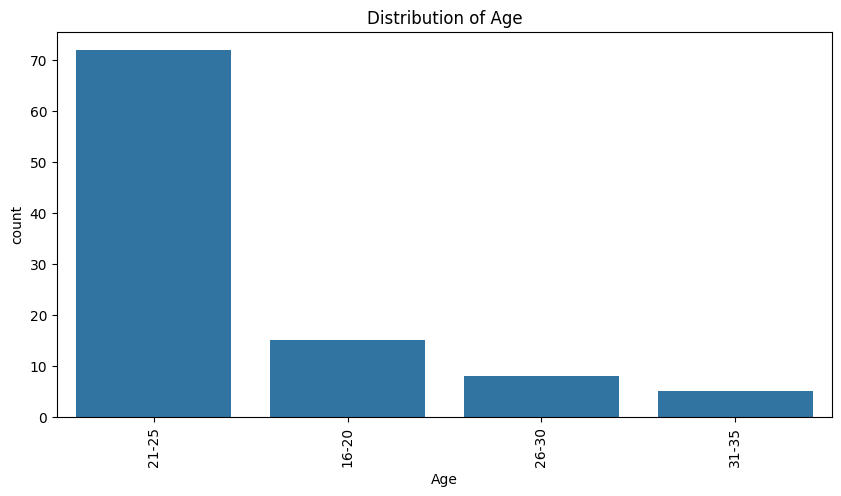

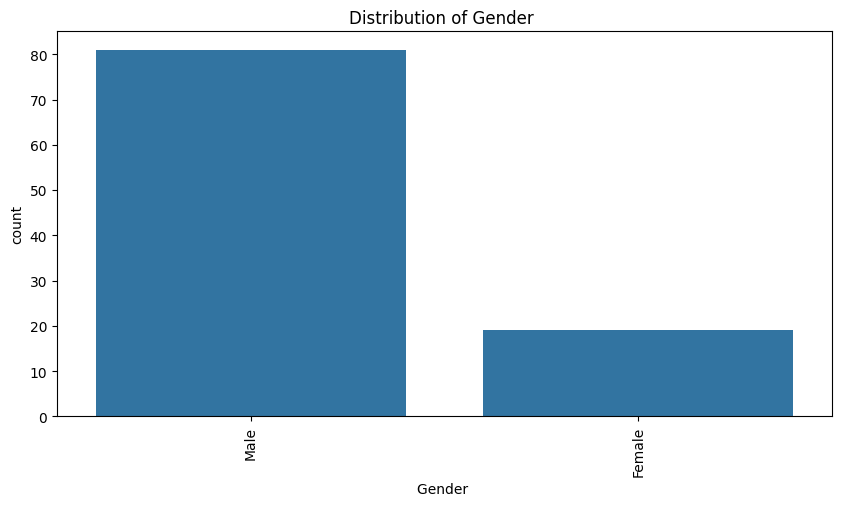

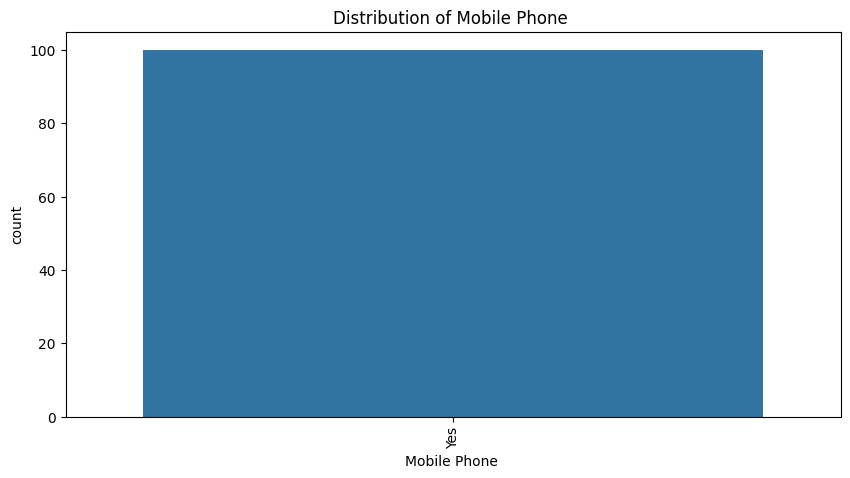

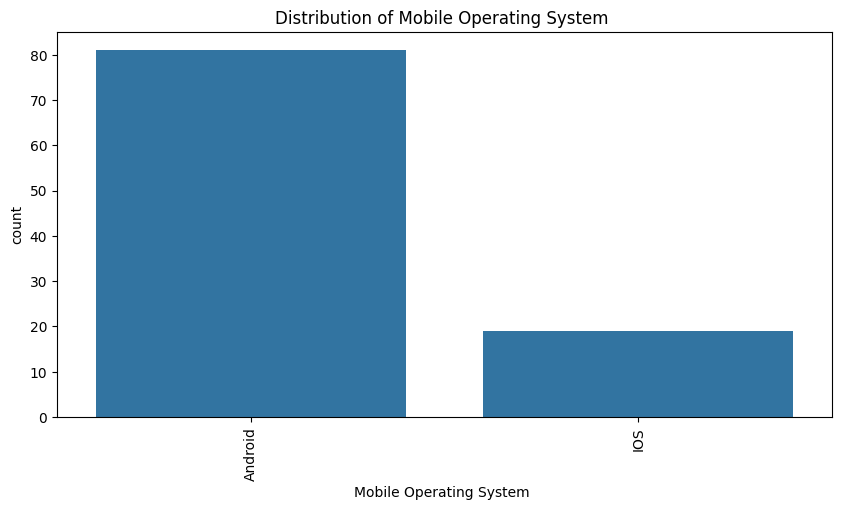

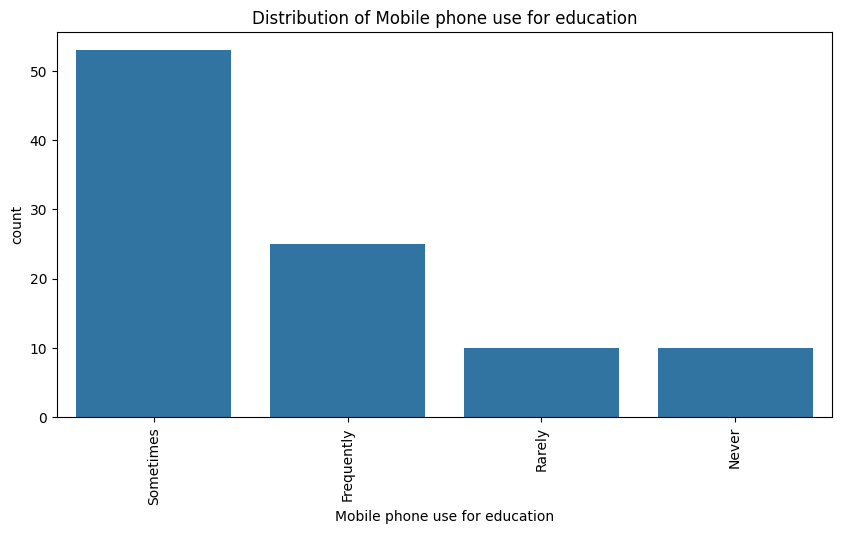

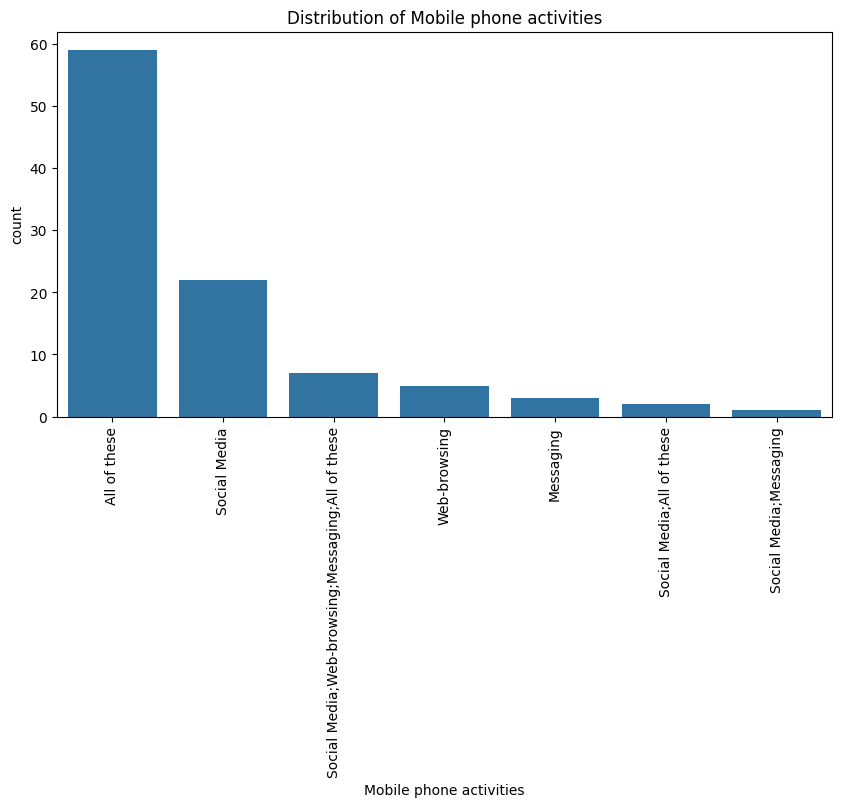

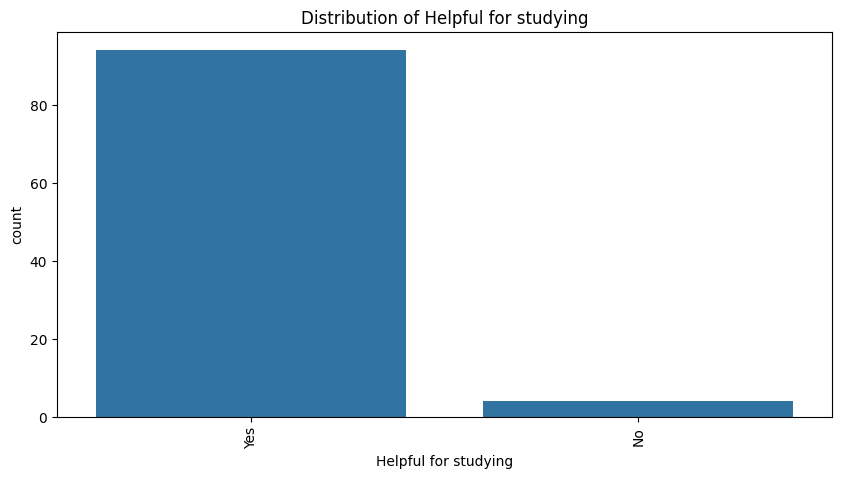

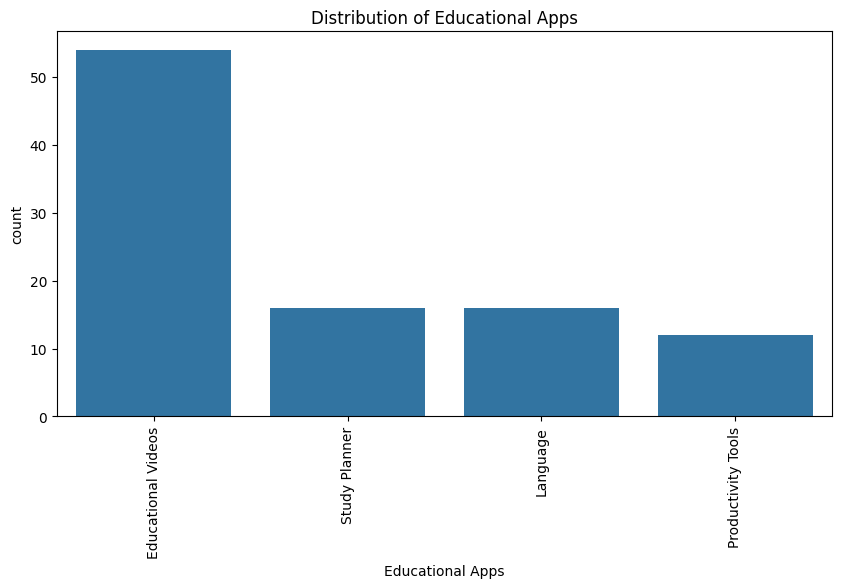

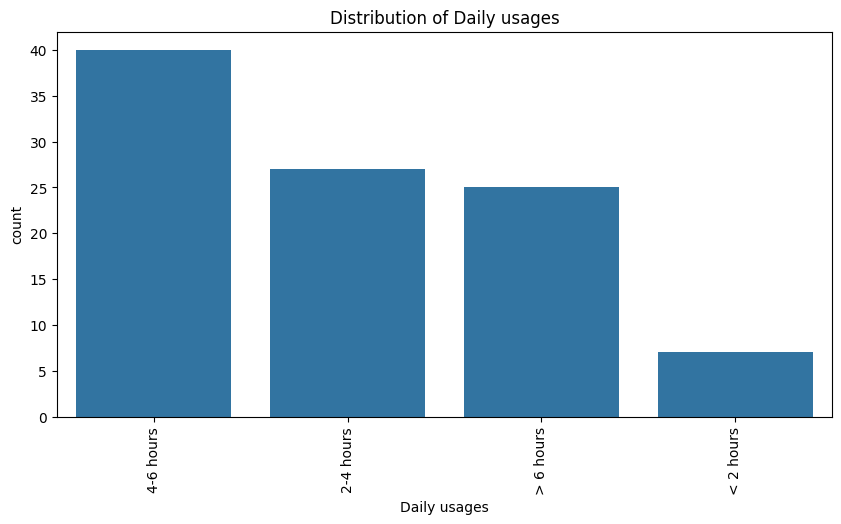

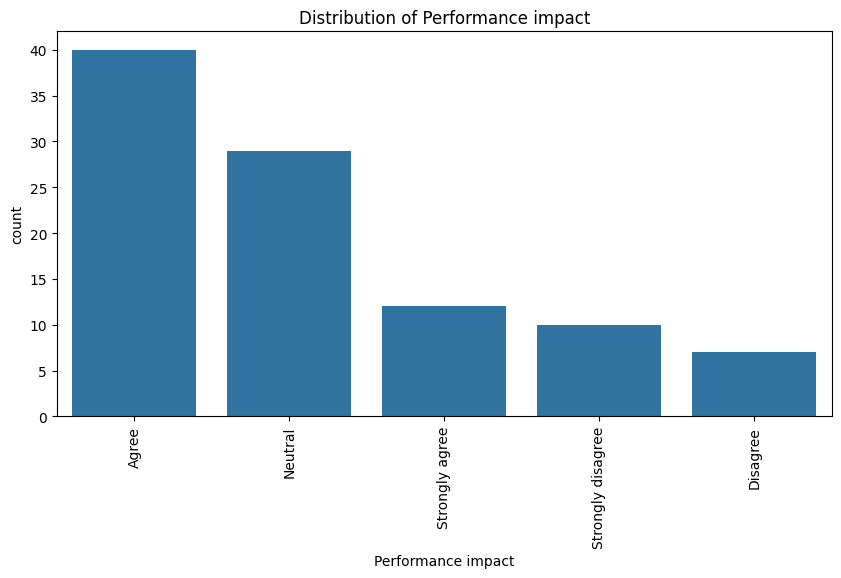

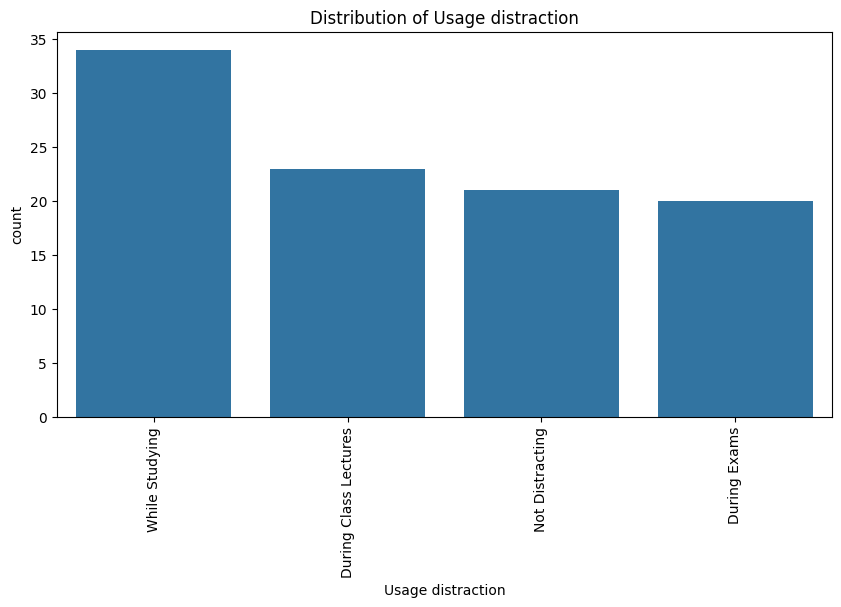

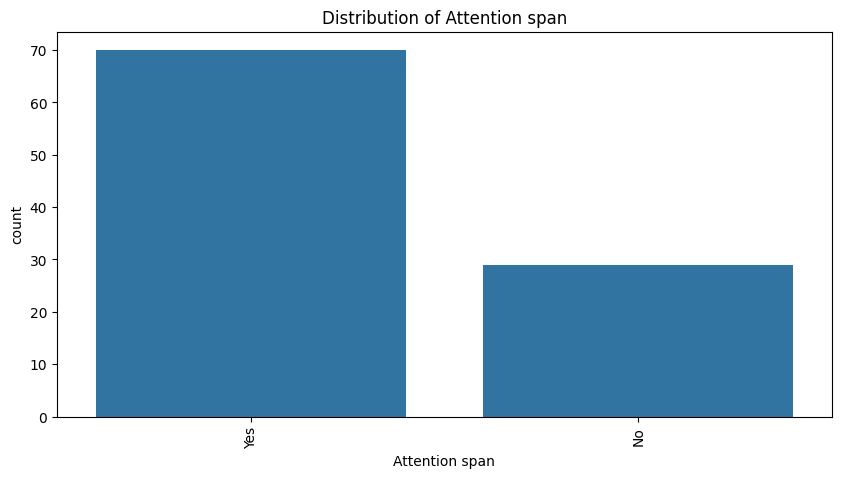

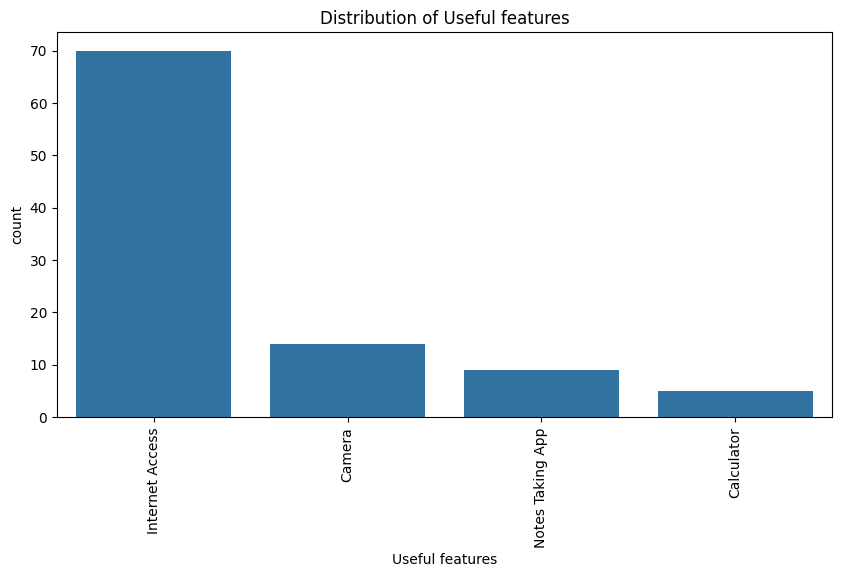

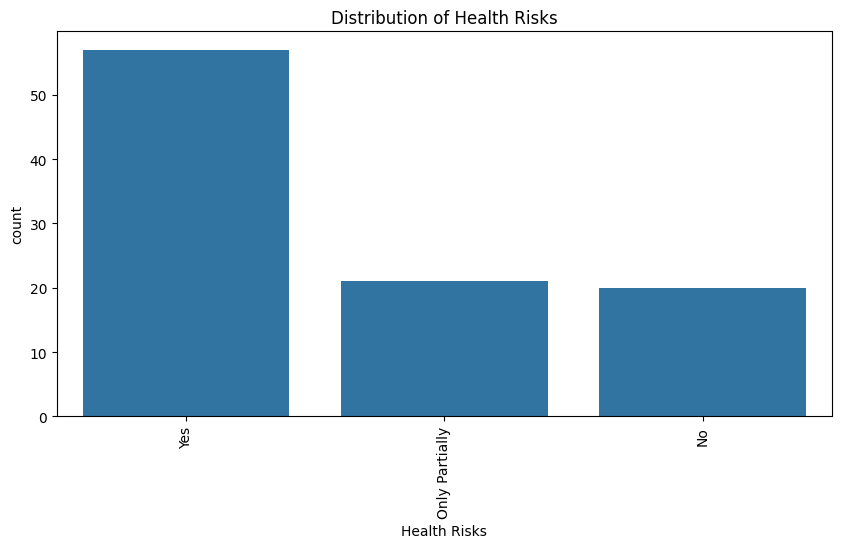

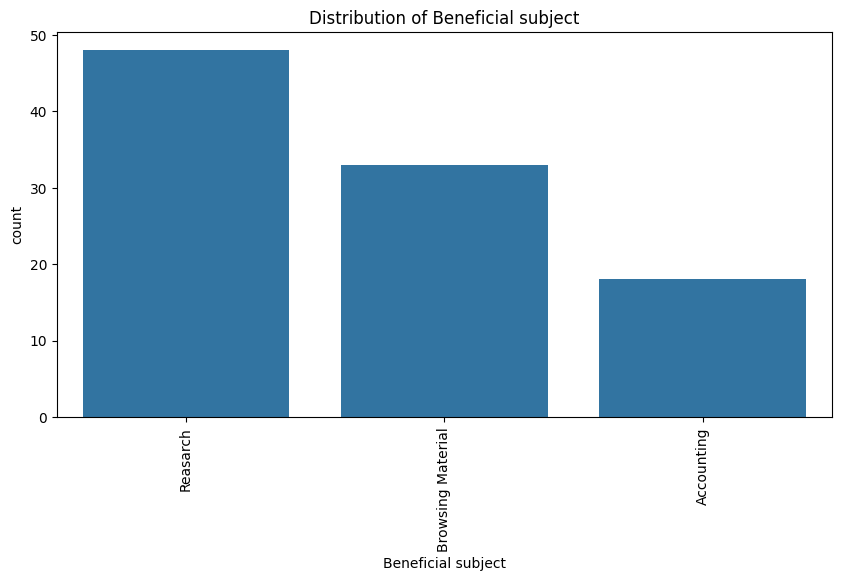

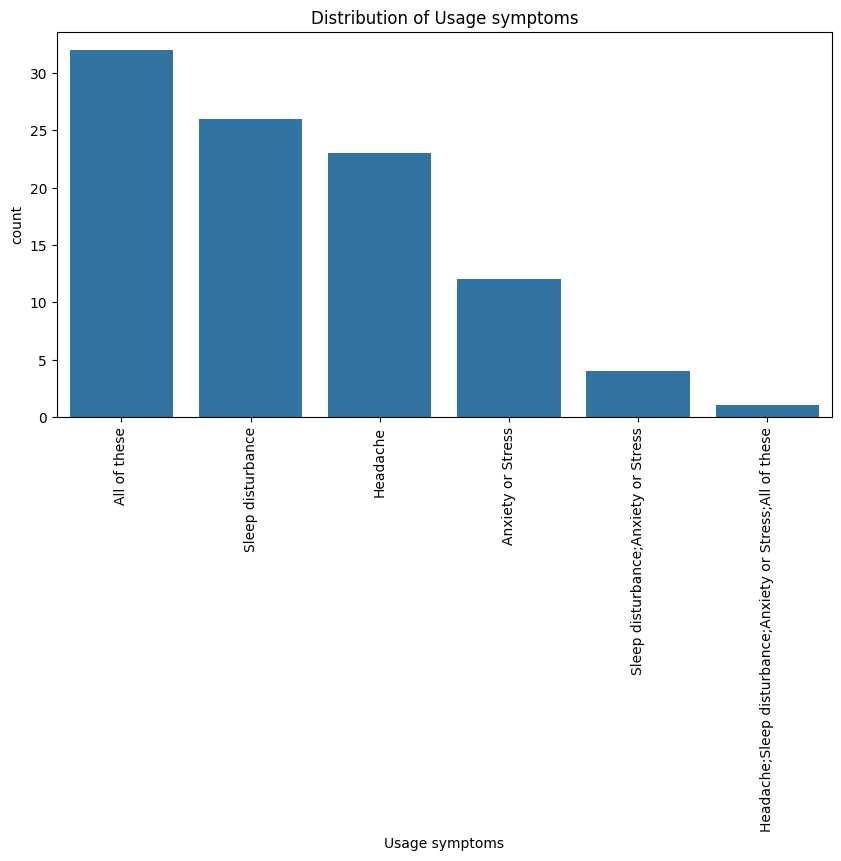

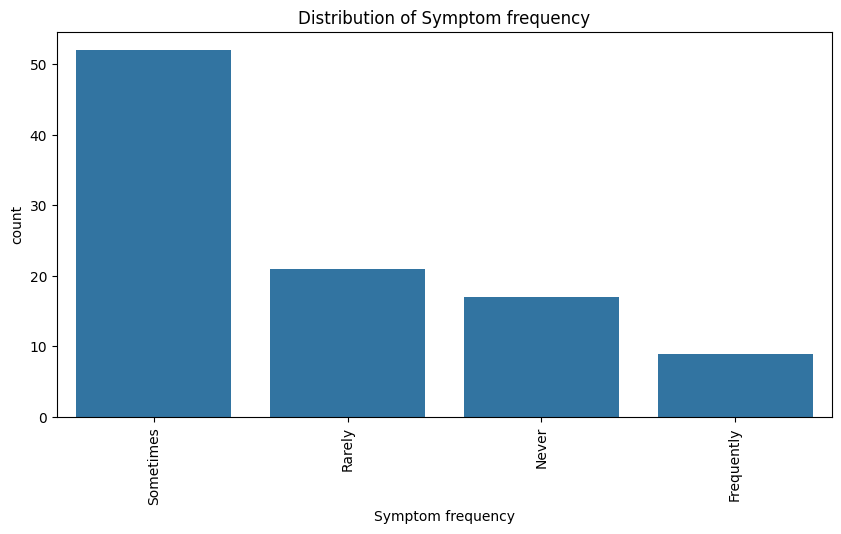

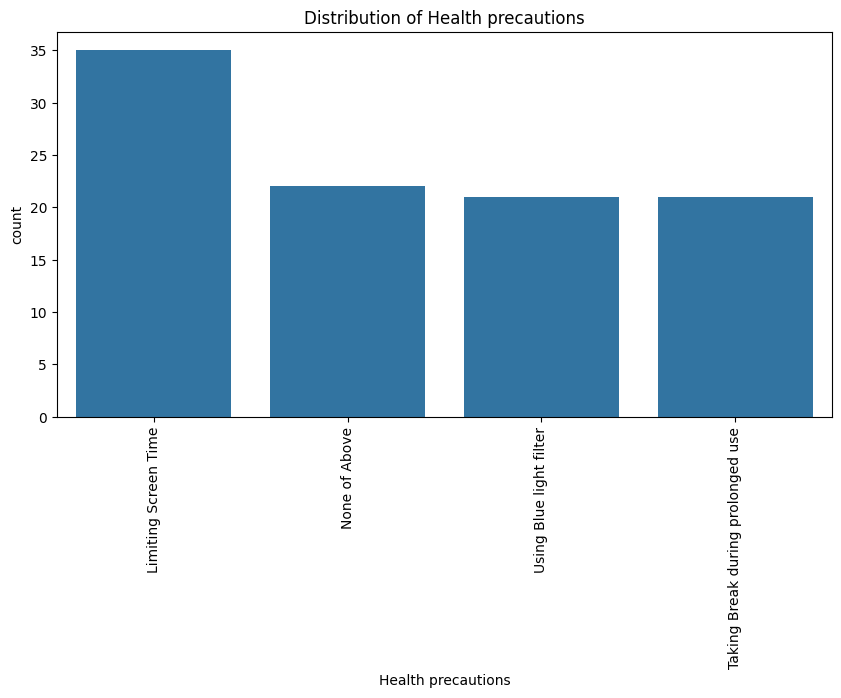

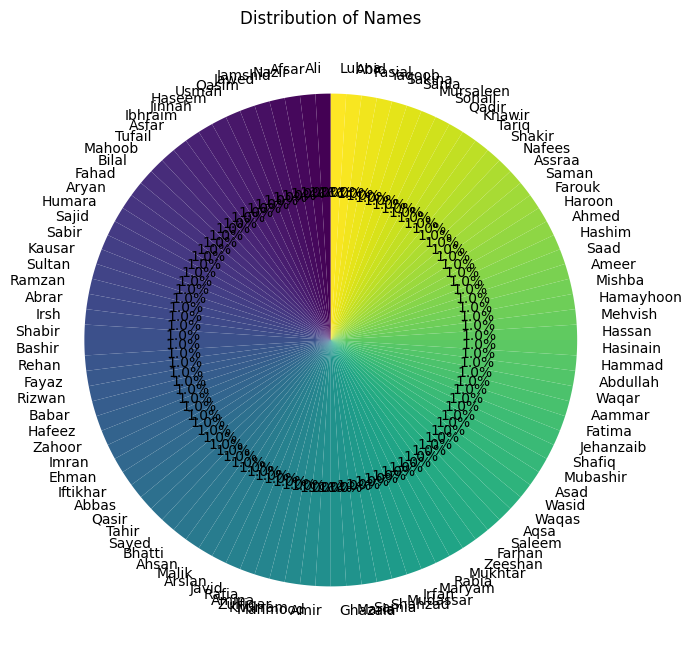

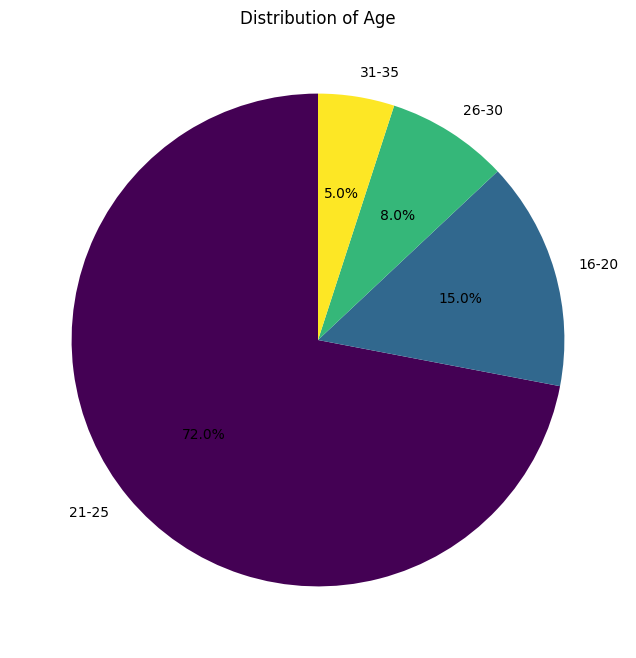

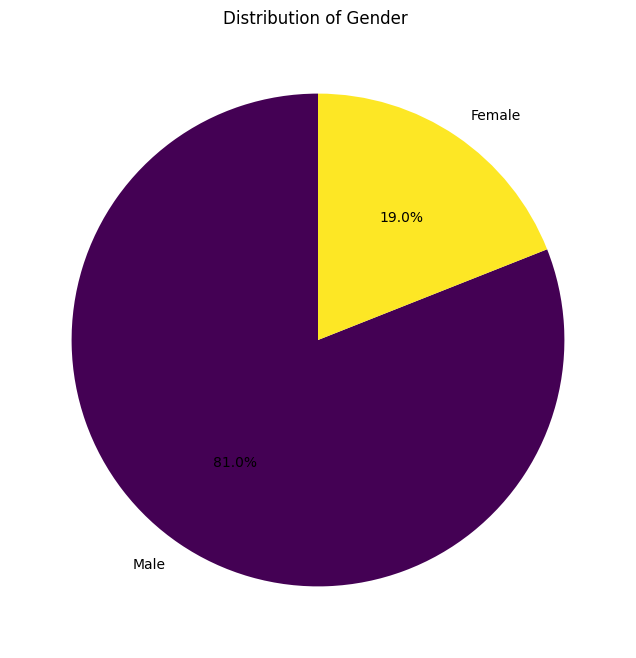

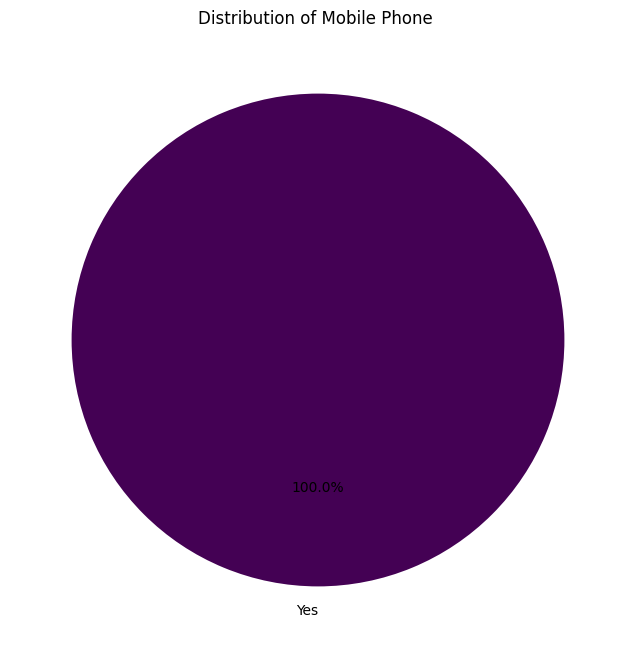

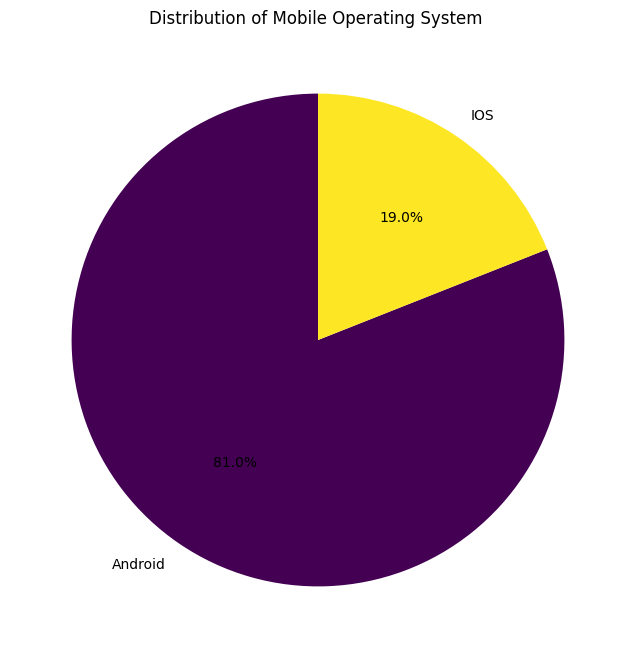

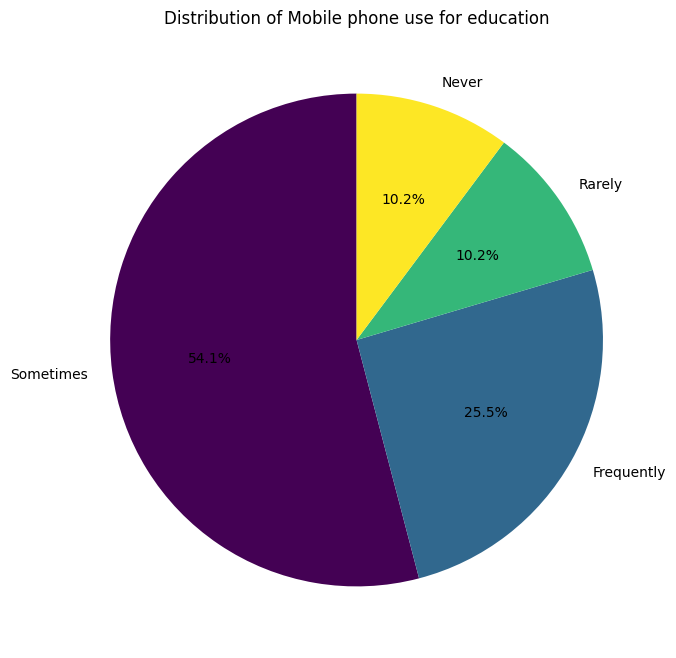

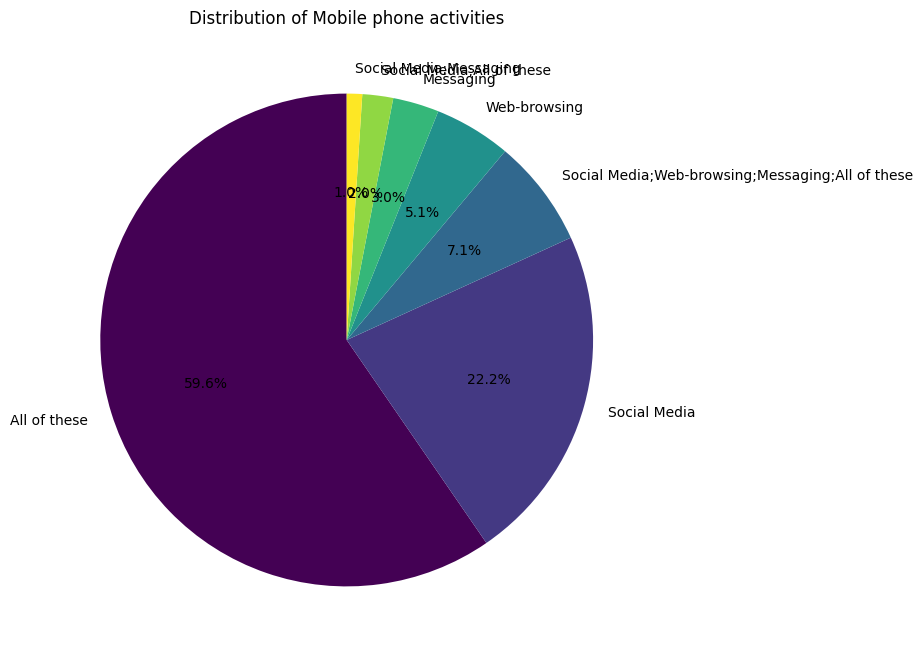

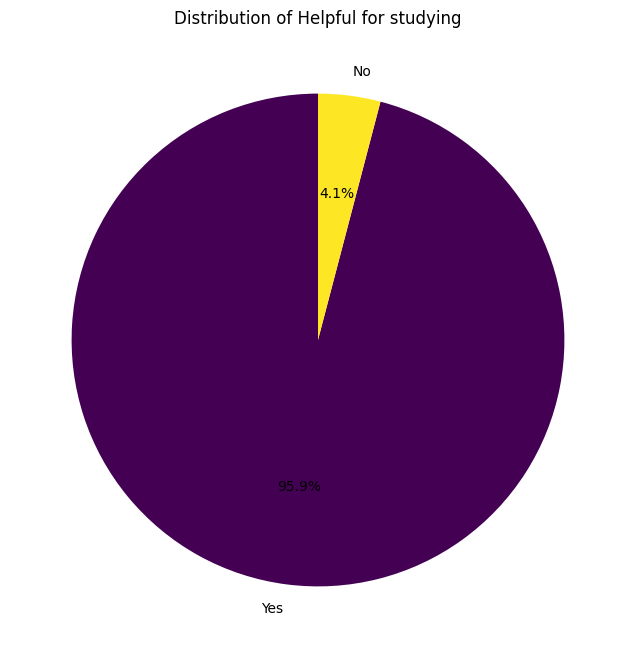

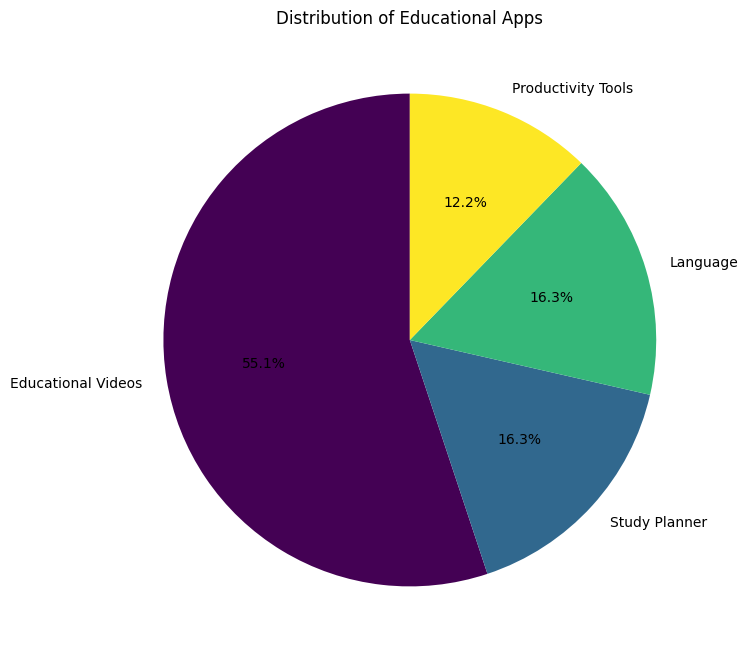

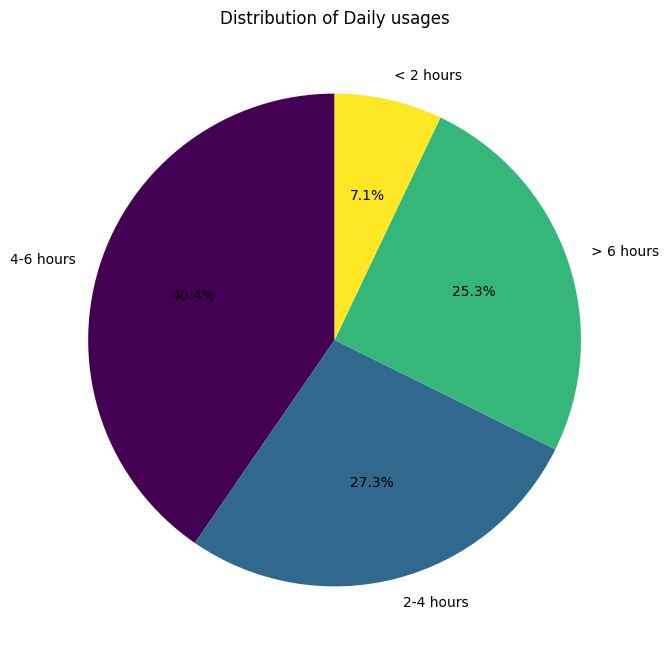

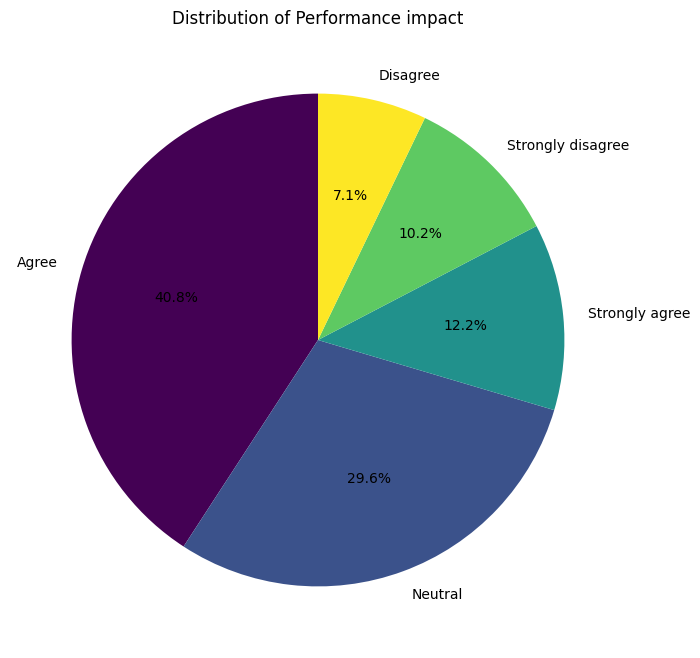

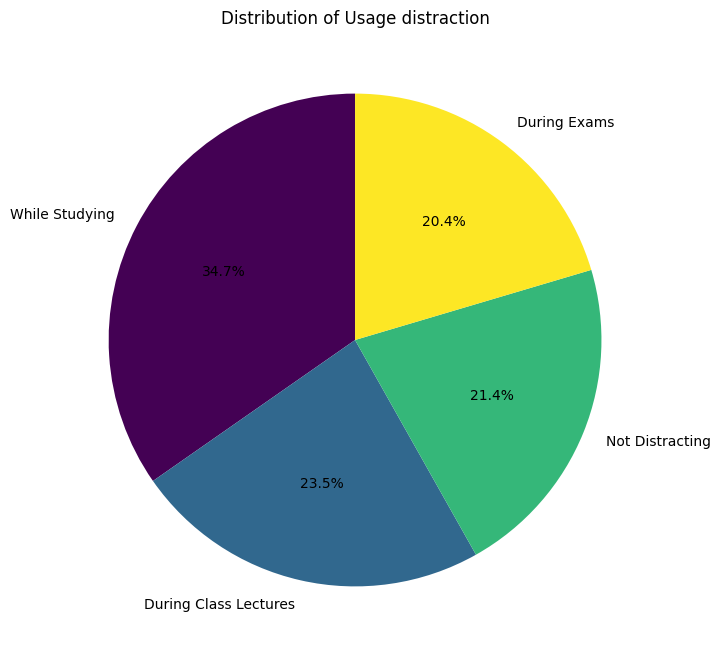

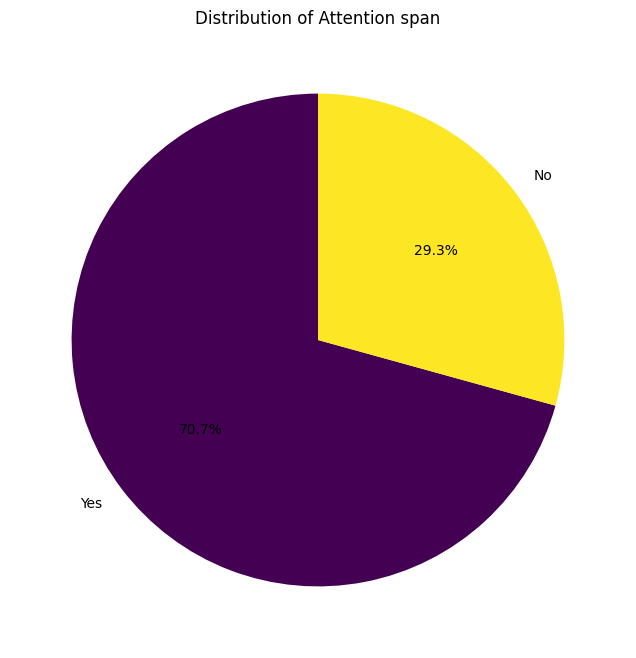

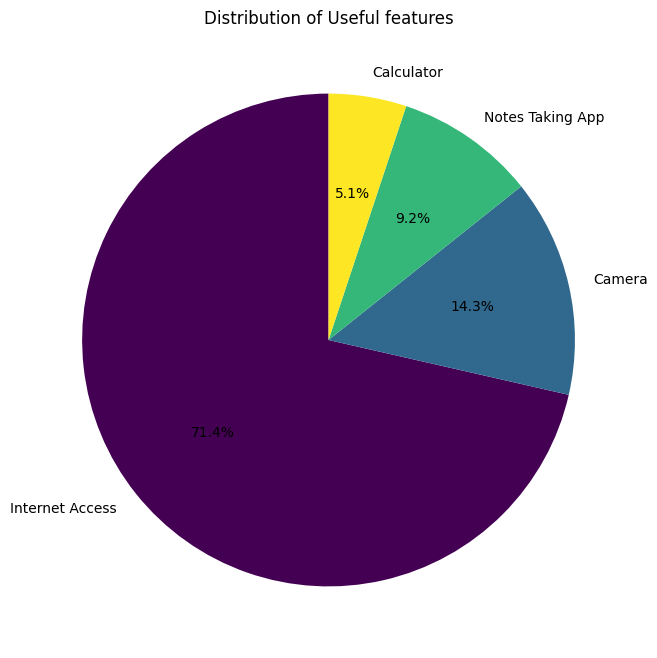

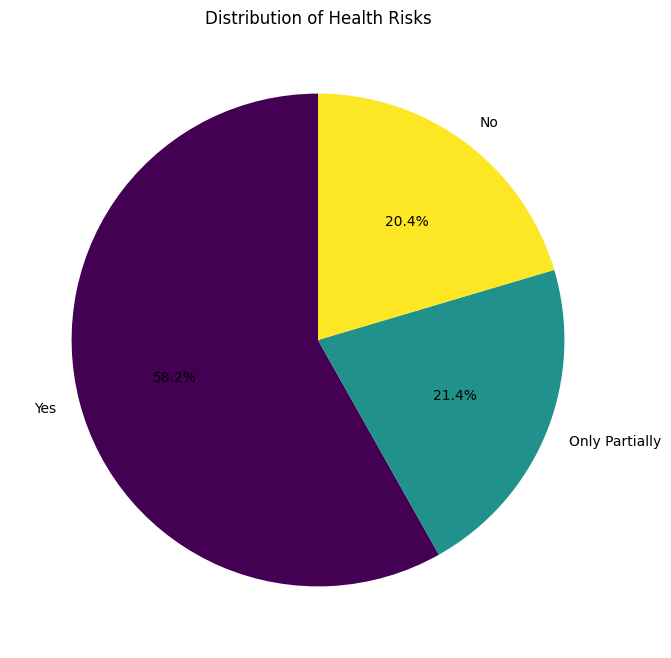

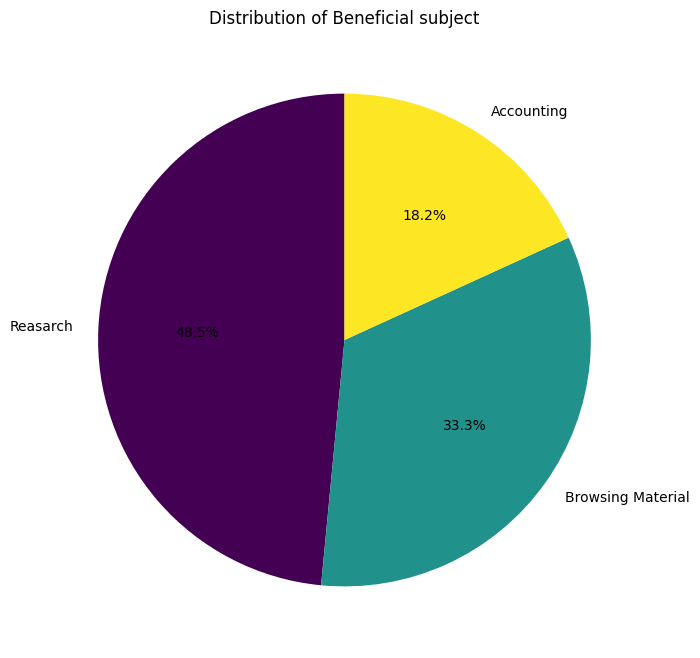

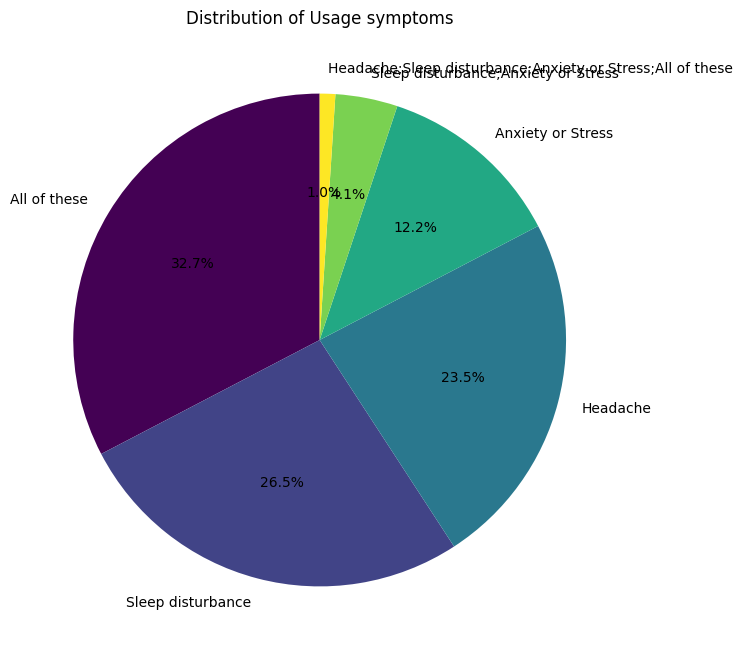

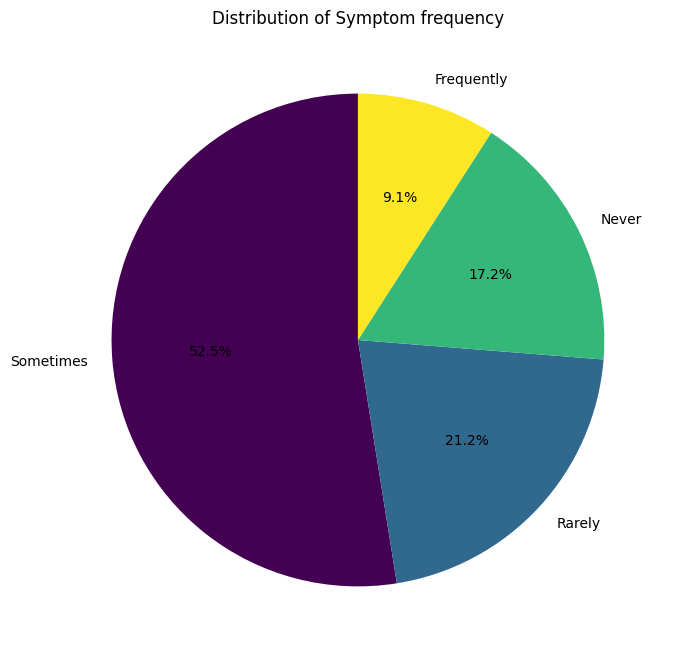

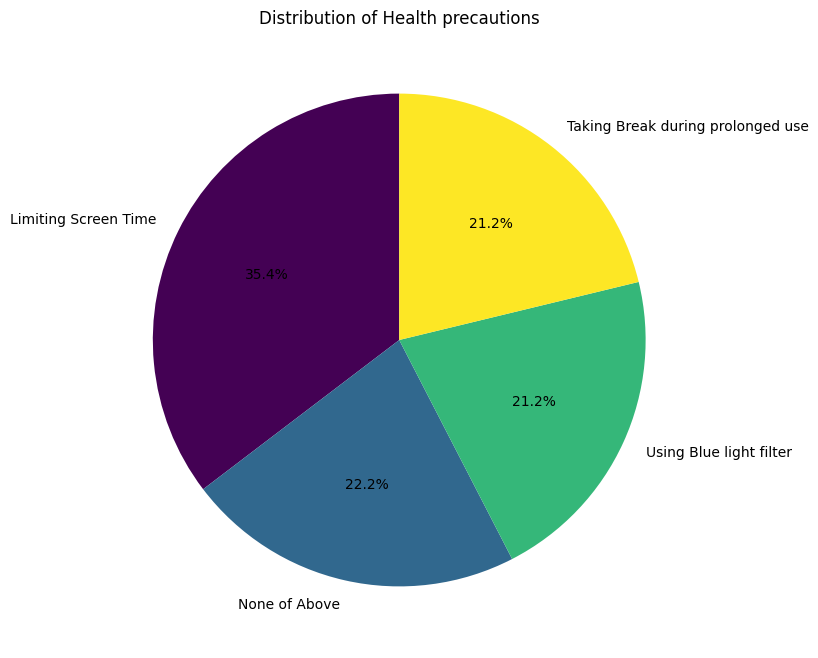

Decision Tree Accuracy: 0.45
Random Forest Accuracy: 0.65
Decision Tree Classification Report:
               precision    recall  f1-score   support

   Excellent       0.50      0.29      0.36         7
        Fair       0.00      0.00      0.00         0
        Good       0.58      0.58      0.58        12
   Good;Fair       0.00      0.00      0.00         1

    accuracy                           0.45        20
   macro avg       0.27      0.22      0.24        20
weighted avg       0.53      0.45      0.48        20

Random Forest Classification Report:
               precision    recall  f1-score   support

   Excellent       0.67      0.57      0.62         7
        Fair       0.00      0.00      0.00         0
        Good       0.69      0.75      0.72        12
   Good;Fair       0.00      0.00      0.00         1

    accuracy                           0.65        20
   macro avg       0.34      0.33      0.33        20
weighted avg       0.65      0.65      0.65        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Undefin

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Print the first few rows to verify
print(df.head())

# Print the column names to verify
print(df.columns)

# Assuming 'Health rating' is the target variable
target_column = 'Health rating'

# Handle Missing Data
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Removing Duplicates
df_imputed.drop_duplicates(inplace=True)

# Treat all columns as categorical, except the target
categorical_features = [col for col in df.columns if col != target_column]

# Encoding Categorical Variables
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the target variable
X = df_imputed.drop(target_column, axis=1)
y = df_imputed[target_column]

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Exploratory Data Analysis (EDA)

# 1. Bar plots for categorical variables
for column in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {column}')
    plt.show()



# 3. Encoding categorical variables for pair plot
df_encoded = df.apply(lambda x: pd.factorize(x)[0])

# 5. Pie charts for categorical data distribution
for column in categorical_features:
    plt.figure(figsize=(8, 8))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()

# Modeling using Traditional Machine Learning Methods

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrices
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
